# OpenFace predictions
### This scripts contains EDA, code regarding personality traits that has not been used, and OpenFace predictions.

## Loading the data

In [1]:
# Importing the libraries to load the data
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
import scipy
import scipy.stats
from scipy.io import loadmat

In [2]:
path = # Please provide own path
#os.listdir(path)

In [3]:
infile_annot_training = open(path+"\\"+"annotation_training.pkl", "rb")
annotation_training = pickle.load(infile_annot_training, encoding = "latin1")

infile_annot_validation = open(path+"\\"+"annotation_validation.pkl", "rb")
annotation_validation = pickle.load(infile_annot_validation, encoding = "latin1")

#infile_trans_test = open(path+"\\"+"transcription_test.pkl", "rb")
#transcription_test = pickle.load(infile_trans_test, encoding = "latin1")

#infile_trans_training = open(path+"\\"+"transcription_training.pkl", "rb")
#transcription_training = pickle.load(infile_trans_training, encoding = "latin1")

#infile_trans_validation = open(path+"\\"+"transcription_validation.pkl", "rb")
#transcription_validation = pickle.load(infile_trans_validation, encoding = "latin1")

In [4]:
# Reading in the ethnicity and gender data
excel_data = pd.read_excel(r"C:\Users\Marie-Claire\Downloads\eth_gender_anno_all.xlsx")
#excel_data.head()

## Data analysis

In [5]:
# Checking number of unique YoutTube vloggers
excel_data['YouTubeID'].nunique()

3060

In [6]:
# Converting the annotation data to a dataframe and specifying the index column
anno_df = pd.DataFrame(annotation_training)
anno_df.reset_index(inplace = True)

anno_test_df = pd.DataFrame(annotation_validation)
anno_test_df.reset_index(inplace = True)

In [7]:
# Renaming column to merge the gender-ethnicity and training annotation dataframes
anno_df.rename(columns = {"index" : "VideoName", 
                         }, inplace = True)

# Entire dataframe with train and test combined
anno_test_df.rename(columns = {"index" : "VideoName", 
                         }, inplace = True)

# Merging the dataframes anno_df and excel_data on the VideoName column as a training set
merged_df = pd.merge(anno_df, excel_data, how = "left", on = ["VideoName"])
#merged_df.info

In [8]:
# Creating complete data frame for EDA
anno_complete = pd.concat([anno_df, anno_test_df])
all_data = pd.merge(anno_complete, excel_data, how = "left", on = ["VideoName"])

In [9]:
# Checking for missing data & outliers
print(all_data.isnull().any())
print(all_data.describe())

VideoName            False
extraversion         False
neuroticism          False
agreeableness        False
conscientiousness    False
interview            False
openness             False
YouTubeID            False
Ethnicity            False
Gender               False
dtype: bool
       extraversion  neuroticism  agreeableness  conscientiousness  \
count   8000.000000  8000.000000    8000.000000        8000.000000   
mean       0.476313     0.520605       0.548898           0.524053   
std        0.151226     0.152635       0.134234           0.155351   
min        0.000000     0.000000       0.000000           0.000000   
25%        0.373832     0.416667       0.461538           0.417476   
50%        0.476636     0.531250       0.560440           0.524272   
75%        0.579439     0.625000       0.637363           0.640777   
max        1.000000     0.979167       1.000000           1.000000   

         interview     openness    Ethnicity       Gender  
count  8000.000000  8000.00

In [10]:
# Convert columns to lowercase
all_data.columns = all_data.columns.str.lower()
merged_df.columns = merged_df.columns.str.lower()

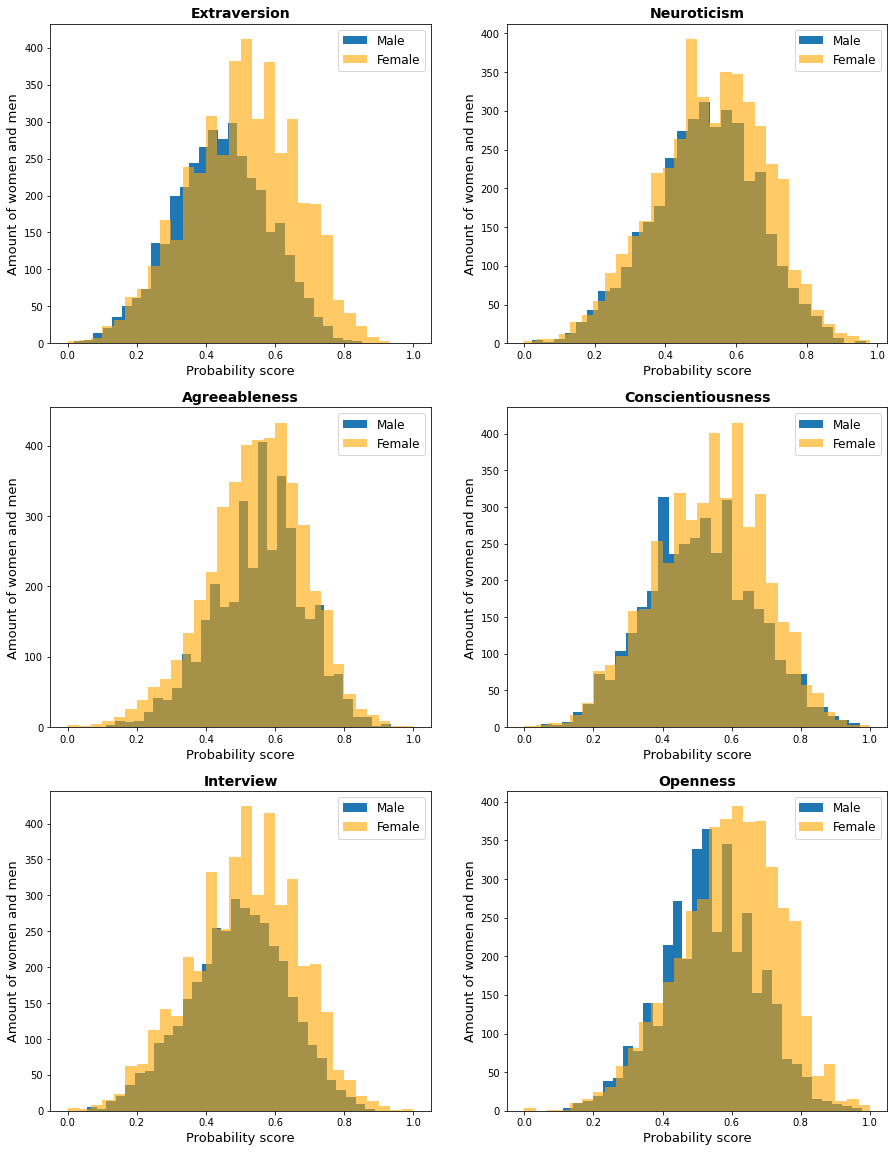

In [11]:
# Displaying distributions of gender per personality trait and the interview variable
cols = all_data[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'interview', 'openness']]
fig = plt.figure(figsize = (15,20))
i = 0
for column in cols:
    i += 1
    fig.add_subplot(3, 2, i)
    plt.hist(all_data[all_data["gender"] == 1][column], label = "Male", bins = 30)
    plt.hist(all_data[all_data["gender"] == 2][column], label = "Female", bins = 30, alpha = 0.6, color= 'orange')
    plt.title(column.capitalize(), fontsize = 14, fontweight='bold')
    plt.xlabel("Probability score", fontsize= 13)
    plt.ylabel("Amount of women and men", fontsize= 13)
    plt.legend(loc = "upper right", fontsize = "large")

In [12]:
# Descriptives of men for personality traits and interviewability
all_data[all_data["gender"] == 1].describe()

,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness,ethnicity,gender
count,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.0
mean,0.442110,0.511578,0.552241,0.510254,0.492741,0.539315,2.050959,1.0
std,0.139070,0.147526,0.129411,0.154931,0.142843,0.137482,0.305482,0.0
min,0.018692,0.020833,0.109890,0.048544,0.056075,0.111111,1.000000,1.0
25%,0.345794,0.416667,0.472527,0.398058,0.401869,0.444444,2.000000,1.0
50%,0.439252,0.520833,0.560440,0.504854,0.495327,0.544444,2.000000,1.0
75%,0.542056,0.614583,0.648352,0.621359,0.588785,0.633333,2.000000,1.0
max,0.850467,0.968750,0.934066,0.970874,0.887850,0.977778,3.000000,1.0


In [13]:
# Descriptives of wpmen for personality traits and interviewability
all_data[all_data["gender"] == 2].describe()

,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness,ethnicity,gender
count,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.000000,4350.0
mean,0.505012,0.528180,0.546093,0.535632,0.513443,0.588925,2.086897,2.0
std,0.155015,0.156408,0.138103,0.154774,0.153192,0.149256,0.414486,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
25%,0.392523,0.416667,0.461538,0.427184,0.411215,0.488889,2.000000,2.0
50%,0.514019,0.541667,0.549451,0.543689,0.523364,0.600000,2.000000,2.0
75%,0.616822,0.645833,0.637363,0.650485,0.626168,0.688889,2.000000,2.0
max,1.000000,0.979167,1.000000,1.000000,1.000000,1.000000,3.000000,2.0


---------------
#### Distributions per ethnical group

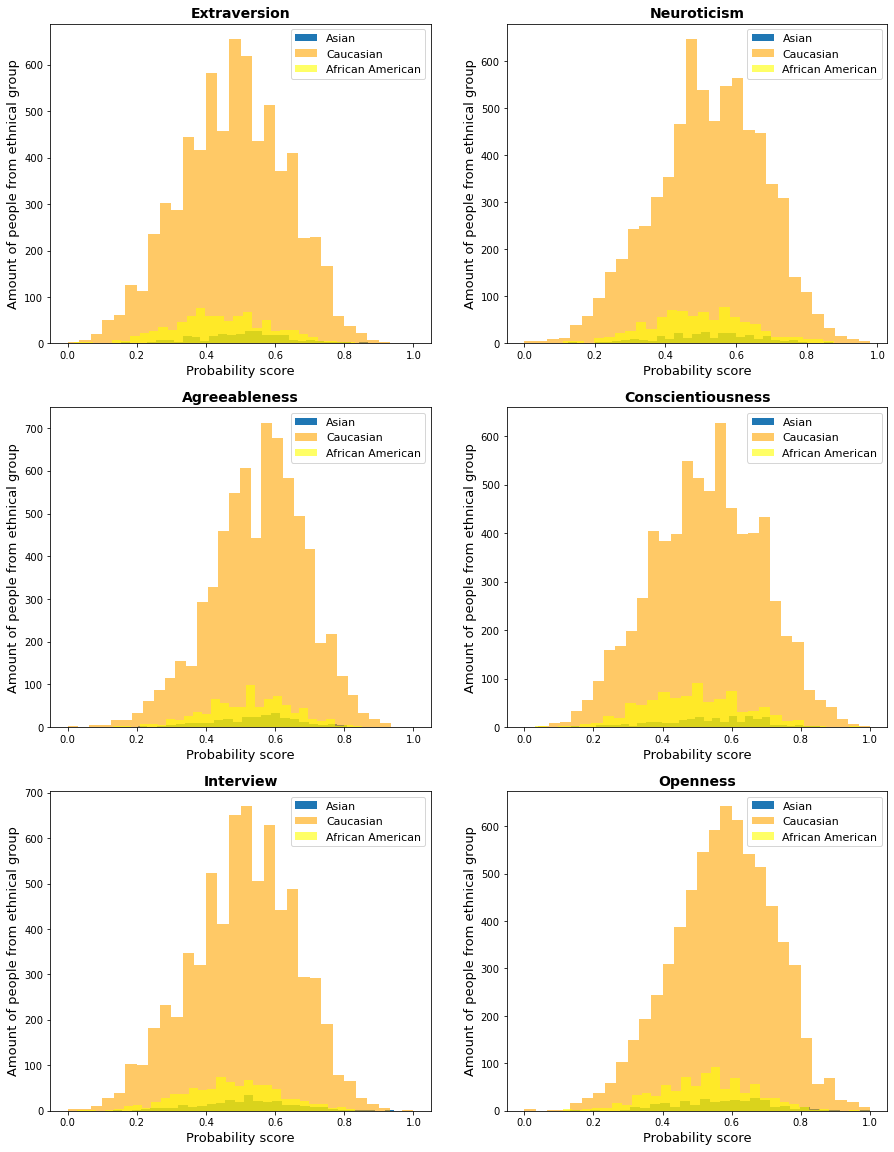

In [14]:
# Displaying distributions of ethnicity per personality trait and the interview variable
cols = all_data[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'interview', 'openness']]
fig = plt.figure(figsize = (15,20))
i = 0
for column in cols:
    i += 1
    fig.add_subplot(3, 2, i)
    plt.hist(all_data[all_data["ethnicity"] == 1][column], label = "Asian", bins = 30)
    plt.hist(all_data[all_data["ethnicity"] == 2][column], label = "Caucasian",bins = 30, alpha = 0.6, color= 'orange')
    plt.hist(all_data[all_data["ethnicity"] == 3][column], label = "African American", bins = 30, alpha = 0.6, color= 'yellow')
    plt.title(column.capitalize(), fontsize = 14, fontweight='bold')
    plt.xlabel("Probability score", fontsize = 13)
    plt.ylabel("Amount of people from ethnical group", fontsize = 13)
    plt.legend(loc = "upper right", fontsize = 11)

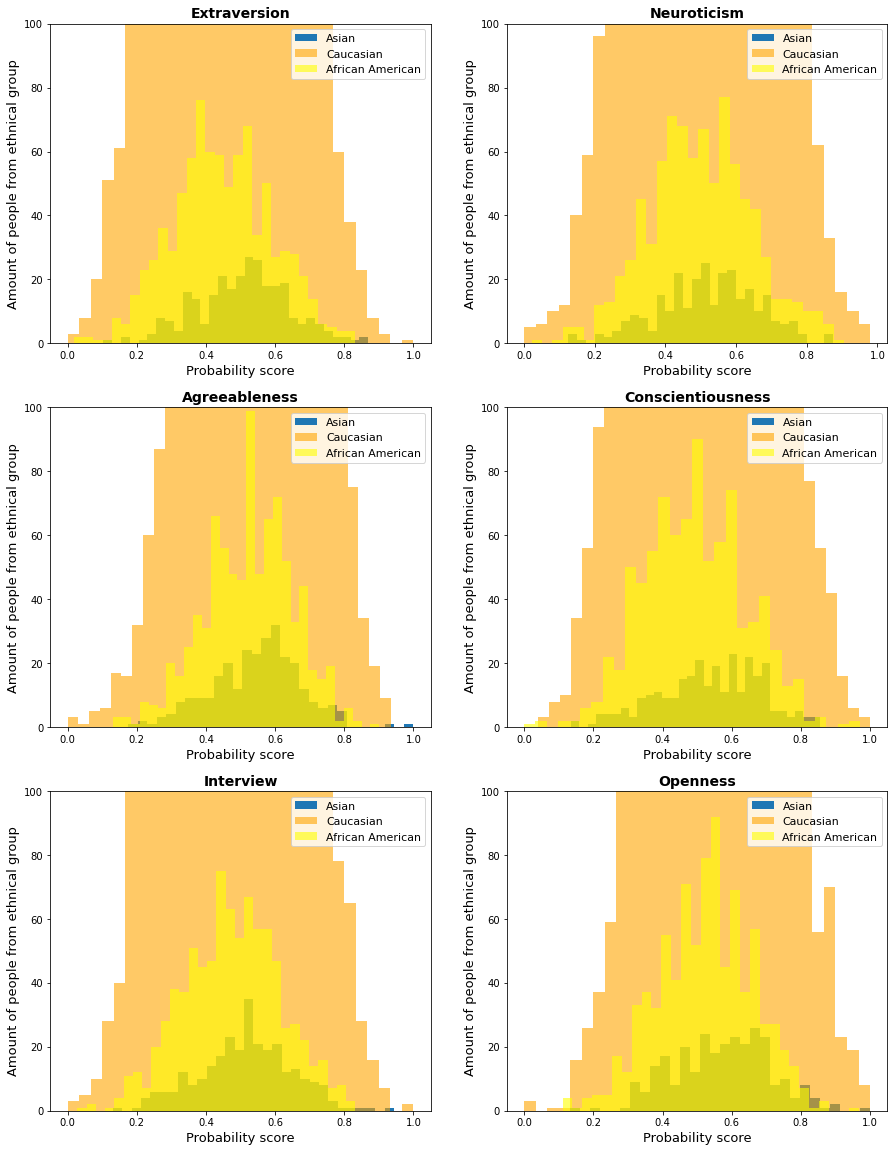

In [15]:
# Displaying distributions of ethnicity per personality trait and the interview variable
cols = all_data[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'interview', 'openness']]
fig = plt.figure(figsize = (15, 20))
i = 0
for column in cols:
    i += 1
    fig.add_subplot(3, 2, i)
    plt.hist(all_data[all_data["ethnicity"] == 1][column], label = "Asian", bins = 30)
    plt.hist(all_data[all_data["ethnicity"] == 2][column], label = "Caucasian", bins = 30, alpha = 0.6, color= 'orange')
    plt.hist(all_data[all_data["ethnicity"] == 3][column], label = "African American", bins = 30, alpha = 0.6, color= 'yellow')
    plt.title(column.capitalize(), fontsize = 14, fontweight='bold')
    plt.xlabel("Probability score", fontsize = 13)
    plt.ylabel("Amount of people from ethnical group", fontsize = 13)
    plt.ylim([0, 100])
    plt.legend(loc = "upper right", fontsize = 11)

In [16]:
# Descriptives of Asian ethnicity for personality traits and interviewability
all_data[all_data["ethnicity"] == 1].describe()

,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness,ethnicity,gender
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.0,283.000000
mean,0.507348,0.519287,0.547198,0.538406,0.515274,0.573852,1.0,1.710247
std,0.132338,0.140870,0.126718,0.145939,0.134487,0.138687,0.0,0.454451
min,0.102804,0.125000,0.175824,0.135922,0.130841,0.133333,1.0,1.000000
25%,0.420561,0.427083,0.461538,0.446602,0.429907,0.477778,1.0,1.000000
50%,0.514019,0.520833,0.560440,0.553398,0.523364,0.577778,1.0,2.000000
75%,0.588785,0.614583,0.631868,0.650485,0.607477,0.666667,1.0,2.000000
max,0.869159,0.875000,1.000000,0.854369,0.943925,1.000000,1.0,2.000000


In [17]:
# Descriptives of Caucasian ethnicity for personality traits and interviewability
all_data[all_data["ethnicity"] == 2].describe()

,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness,ethnicity,gender
count,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.0,6870.000000
mean,0.478726,0.523535,0.552215,0.527567,0.507137,0.571215,2.0,1.519651
std,0.152618,0.153701,0.135148,0.156264,0.150263,0.146758,0.0,0.499650
min,0.000000,0.000000,0.000000,0.038835,0.000000,0.000000,2.0,1.000000
25%,0.373832,0.427083,0.461538,0.417476,0.411215,0.477778,2.0,1.000000
50%,0.485981,0.531250,0.560440,0.533981,0.514019,0.577778,2.0,2.000000
75%,0.588785,0.635417,0.648352,0.640777,0.616822,0.677778,2.0,2.000000
max,1.000000,0.979167,0.934066,1.000000,1.000000,1.000000,2.0,2.000000


In [18]:
# Descriptives of African American ethnicity for personality traits and interviewability
all_data[all_data["ethnicity"] == 3].describe()

,extraversion,neuroticism,agreeableness,conscientiousness,interview,openness,ethnicity,gender
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.0,847.000000
mean,0.446369,0.497282,0.522568,0.490755,0.474771,0.523823,3.0,1.683589
std,0.141441,0.145727,0.126214,0.146789,0.138996,0.136060,0.0,0.465350
min,0.018692,0.020833,0.131868,0.000000,0.028037,0.111111,3.0,1.000000
25%,0.345794,0.395833,0.439560,0.388350,0.378505,0.433333,3.0,1.000000
50%,0.439252,0.500000,0.527473,0.485437,0.476636,0.533333,3.0,2.000000
75%,0.542056,0.588542,0.615385,0.592233,0.579439,0.622222,3.0,2.000000
max,0.831776,0.906250,0.901099,0.970874,0.831776,0.966667,3.0,2.000000


In [19]:
# Counting the amount of men and women in train + test set
all_data.groupby(["gender"]).size()

gender
1    3650
2    4350
dtype: int64

In [20]:
# Descriptive statistics grouped by ethnicity and gender
all_data.groupby(['ethnicity','gender']).size()           # imbalanced groups

ethnicity  gender
1          1           82
           2          201
2          1         3300
           2         3570
3          1          268
           2          579
dtype: int64

-----------------------

## Multiple Linear Regression with personality traits
###  -- This part has been discarded due to high correlations --

#### All models that will be trained:
- X1 = Job interview ~ Personality traits
- X2 = Job interview ~ Personality traits + Gender
- X3 = Job interview ~ Personality traits + Ethnicity
- X4 = Job interview ~ Personality traits + Facial
- X5 = Job interview ~ Personality traits + Gender + Ethnicity
- X6 = Job interview ~ Personality traits + Gender + Facial
- X7 = Job interview ~ Personality traits + Ethnicity + Facial
- X8 = Job interview ~ Personality traits + Gender + Ethnicity + Facial

### X5 - Job interview ~ Personality traits  + Gender + Ethnicity
###### I have trained the largest model without facial data first (X5), followed by X1, X2 and X3

In [21]:
# Splitting the (in)dependent variables
X5 = merged_df[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness','ethnicity','gender']].values
y5 = merged_df.loc[:,['interview']].values

print(X5[:3, :])                                # Testing

[[0.52336449 0.55208333 0.62637363 0.60194175 0.48888889 3.
  2.        ]
 [0.34579439 0.375      0.47252747 0.58252427 0.36666667 2.
  2.        ]
 [0.25233645 0.29166667 0.40659341 0.48543689 0.51111111 2.
  2.        ]]


In [22]:
# Make a dummy variable of the categorical values of ethnicity (Asian, Caucasian & African American)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
X5 = np.array(ct.fit_transform(X5))             # Numpy array is expected by models

print(X5[:5, :3])                               # Testing

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [23]:
# Making a dummy variable of the categorical values of gender
le = LabelEncoder()
X5[:, -1] = le.fit_transform(X5[:, -1])

print(X5[:5,-1])                                # Testing

[1. 1. 1. 0. 1.]


In [24]:
# Avoid 'dummy trap' by removing one column for the model
X5_dummy = X5.copy()
X5_dummy = X5_dummy[:, 1:]
X5_dummy[0,:]

# Split the dataset into a train (80%) and test set (20%)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5_dummy, y5, test_size = 0.2, random_state = 0)

# Linear regression
regressor = LinearRegression()
regressor.fit(X5_train, y5_train)

# Predicting the test set labels
y5_pred = regressor.predict(X5_test)

print("MSE {:.3}".format(mean_squared_error(y5_test, y5_pred)))
print("MAE {:.3}".format(mean_absolute_error(y5_test, y5_pred)))

MSE 0.00195
MAE 0.0352


### X1 - Job interview ~ Personality traits

In [25]:
# ---- Model X1 in one cell ----

# Splitting the (in)dependent variables
X1 = merged_df[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness']].values
y1 = merged_df.loc[:,['interview']].values

# -------------------------------------------------------
# Split the dataset into a train and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

# -------------------------------------------------------
# Linear Regression
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)

# -------------------------------------------------------
# Predicting the test set labels
y1_pred = regressor.predict(X1_test)

# -------------------------------------------------------
# Various performance measure scores

print("MSE {:.3}".format(mean_squared_error(y1_test, y1_pred)))
print("MAE {:.3}".format(mean_absolute_error(y1_test, y1_pred)))

MSE 0.00197
MAE 0.0353


### X2 - Job interview ~ Personality traits + gender

In [26]:
# ---- Model X2 in one cell ----

# Splitting the (in)dependent variables
X2 = merged_df[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness', 'gender']].values
y2 = merged_df.loc[:,['interview']].values

# -------------------------------------------------------
# Make a dummy variable of the categorical values of gender
le = LabelEncoder()
X2[:, -1] = le.fit_transform(X2[:, -1])

# -------------------------------------------------------
# Split the dataset into a train and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

# -------------------------------------------------------
# Linear Regression
regressor = LinearRegression()
regressor.fit(X2_train, y2_train)

# -------------------------------------------------------
# Predicting the test set labels
y2_pred = regressor.predict(X2_test)

# -------------------------------------------------------
# Various performance measure scores

print("MSE {:.3}".format(mean_squared_error(y2_test, y2_pred)))
print("MAE {:.3}".format(mean_absolute_error(y2_test, y2_pred)))

MSE 0.00195
MAE 0.0352


### X3 - Job interview ~ Personality traits + ethnicity

In [27]:
# ---- Model X3 in one cell ----

# Splitting the (in)dependent variables
X3 = merged_df[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness','ethnicity']].values
y3 = merged_df.loc[:,['interview']].values

# -------------------------------------------------------
# Make a dummy variable of the categorical values of ethnicity
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X3 = np.array(ct.fit_transform(X3))

# -------------------------------------------------------
# Avoid dummy trap
X3_dummy = X3.copy()
X3_dummy = X3_dummy[:,1:]

# -------------------------------------------------------
# Split the dataset into a train and test set
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_dummy, y3, test_size = 0.2, random_state = 0)

# -------------------------------------------------------
# Linear Regression
regressor = LinearRegression()
regressor.fit(X3_train, y3_train)

# -------------------------------------------------------
# Predicting the test set labels
y3_pred = regressor.predict(X3_test)

# -------------------------------------------------------
# Various performance measure scores

print("MSE {:.3}".format(mean_squared_error(y3_test, y3_pred)))
print("MAE {:.3}".format(mean_absolute_error(y3_test, y3_pred)))

MSE 0.00197
MAE 0.0352


### Checking correlations between the predictors and outcome variable
##### The (Spearman) correlations are quite high for all personality traits

In [28]:
def variable_name(data):
    name =[x for x in globals() if globals()[x] is data][0]
    return name

In [29]:
# Displaying the correlations between the predictors and outcome variable 'interview'
extra = merged_df[['extraversion']].values
neuro = merged_df[['neuroticism']].values
agree = merged_df[['agreeableness']].values
consc = merged_df[['conscientiousness']].values
openn = merged_df[['openness']].values
ethni = merged_df[['ethnicity']].values
sex = merged_df[['gender']].values
interv = merged_df[['interview']].values

variables = [extra, neuro, agree, consc, openn, ethni, sex]
  
for var in variables:
    name = variable_name(var)
    print(name.capitalize(), 'correlations with "interview" variable:')
    # Spearman's rho correlation
    print(scipy.stats.spearmanr(var, interv))
    # Kendall's tau correlation
    print(scipy.stats.kendalltau(var, interv))
    print()

Extra correlations with "interview" variable:
SpearmanrResult(correlation=0.8050239315752963, pvalue=0.0)
KendalltauResult(correlation=0.6238569913079077, pvalue=0.0)

Neuro correlations with "interview" variable:
SpearmanrResult(correlation=0.869843644278995, pvalue=0.0)
KendalltauResult(correlation=0.697480137103176, pvalue=0.0)

Agree correlations with "interview" variable:
SpearmanrResult(correlation=0.8120193750572016, pvalue=0.0)
KendalltauResult(correlation=0.63197048127474, pvalue=0.0)

Consc correlations with "interview" variable:
SpearmanrResult(correlation=0.8169734404671612, pvalue=0.0)
KendalltauResult(correlation=0.6364572674609632, pvalue=0.0)

Openn correlations with "interview" variable:
SpearmanrResult(correlation=0.7567326731625008, pvalue=0.0)
KendalltauResult(correlation=0.5752474883106078, pvalue=0.0)

Ethni correlations with "interview" variable:
SpearmanrResult(correlation=-0.0682321257417738, pvalue=1.2211427686714455e-07)
KendalltauResult(correlation=-0.055233

In [30]:
# Preparing the provided validation set to use it as the test set

# Converting the annotation validation data to a dataframe and specifying the index column
anno_val_df = pd.DataFrame(annotation_validation)
anno_val_df.reset_index(inplace = True)

# Renaming column to merge the dataframes
anno_val_df.rename(columns = {"index" : "VideoName", 
                         }, inplace = True)

# Merging the dataframes anno_val_df and excel_data on the VideoName column
merged_val_df = pd.merge(anno_val_df, excel_data, how = "left", on = ["VideoName"])

# Converting columns to lowercase
merged_val_df.columns = merged_val_df.columns.str.lower()
print(merged_val_df.head(2))

             videoname  extraversion  neuroticism  agreeableness  \
0  modNfUPt3F4.002.mp4      0.644860     0.593750       0.615385   
1  h6LOjpCRXtY.005.mp4      0.439252     0.520833       0.417582   

   conscientiousness  interview  openness    youtubeid  ethnicity  gender  
0           0.640777   0.616822  0.555556  modNfUPt3F4          2       1  
1           0.572816   0.439252  0.411111  h6LOjpCRXtY          1       2  


### Using the validation set as a test set

In [31]:
# ---- Model with validation set as test set ----

# Copy previous X1 and y1 as training set
X1TRAIN = X1.copy()
y1TRAIN = y1.copy()

# Splitting the (in)dependent variables of validation set
X1TEST = merged_val_df[['extraversion', 'neuroticism', 'agreeableness','conscientiousness', 'openness']].values
y1TEST = merged_val_df.loc[:,['interview']].values

# -------------------------------------------------------
# Linear Regression
regressor = LinearRegression()
regressor.fit(X1TRAIN, y1TRAIN)

# -------------------------------------------------------
# Predicting the test set labels
Y1PRED = regressor.predict(X1TEST)

# -------------------------------------------------------
# Various performance measure scores

print("MSE {:.3}".format(mean_squared_error(y1TEST, Y1PRED)))
print("MAE {:.3}".format(mean_absolute_error(y1TEST, Y1PRED)))

MSE 0.00186
MAE 0.0344


-------------------

<h1 align="center"> Data preparation OpenFace data</h1> 
<h3 align="center">Creating datasets with mean, min, max and standard deviations for Amplitude, Velocity and Acceleration</h3>

In [32]:
# Function to remove unused columns, and rows with faces that were not succesfully detected
# Subsequently calculates the Amplitude, Velocity and Acceleration
# Rows = per video 
# Columns = all outcome scores for Amplitude, Velocity and Acceleration

def clean(df):
    # Dismiss features in which faces were not succesfully detected
    df = df[df[' success'] == 1]
    
    # Removing landmark information that will not be used
    col_list = []
    for column in df.columns:
        if "eye" in column:
            col_list.append(column)
        elif "x_" in column:
            col_list.append(column)
        elif "y_" in column:
            col_list.append(column)
        elif "X_" in column:
            col_list.append(column)
        elif "Y_" in column:
            col_list.append(column)
        elif "Z_" in column:
            col_list.append(column)
        elif "p_" in column:
            col_list.append(column)
    
    df.drop(col_list, axis = 1, inplace = True)

    # Copy dataframe
    amplitude = df.copy()
    # ---- Amplitude ----
    amplitude_mean = amplitude.mean().add_suffix('_amplitude').add_suffix('_mean')
    amplitude_min = amplitude.min().add_suffix('_amplitude').add_suffix('_min')
    amplitude_max = amplitude.max().add_suffix('_amplitude').add_suffix('_max')
    amplitude_std = amplitude.std().add_suffix('_amplitude').add_suffix('_std')
    # Concatenate all
    amplitude_df = pd.concat([amplitude_mean, amplitude_min, amplitude_max, amplitude_std])
    #print("ampli shape:", amplitude_df.shape)
    
# ---------------------------------
    # Copy dataframe
    velocity = df.copy()
    # ---- Velocity ----
    velocity = velocity.diff()

    velocity_mean = velocity.mean().add_suffix('_velocity').add_suffix('_mean')
    velocity_min = velocity.min().add_suffix('_velocity').add_suffix('_min')
    velocity_max = velocity.max().add_suffix('_velocity').add_suffix('_max')
    velocity_std = velocity.std().add_suffix('_velocity').add_suffix('_std')
    # Concatenate all
    velocity_df = pd.concat([velocity_mean, velocity_min, velocity_max, velocity_std])
    #print("velo shape:", velocity_df.shape)
    
# ---------------------------------
    # Copy dataframe
    acceleration = df.copy()
    # ---- Acceleration ----
    acceleration = acceleration.diff().diff()

    acceleration_mean = acceleration.mean().add_suffix('_acceleration').add_suffix('_mean')
    acceleration_min = acceleration.min().add_suffix('_acceleration').add_suffix('_min')
    acceleration_max = acceleration.max().add_suffix('_acceleration').add_suffix('_max')
    acceleration_std = acceleration.std().add_suffix('_acceleration').add_suffix('_std')
    # Concatenate all
    acceleration_df = pd.concat([acceleration_mean, acceleration_min, acceleration_max, acceleration_std])
    #print("accel shape:", acceleration_df.shape)

# ---------------------------------
    # Concatenate all outcomes into 1 dataframe
    df_final = pd.concat([amplitude_df, velocity_df, acceleration_df])
    df_final = pd.DataFrame(df_final)
    
    return df_final.T                             # Transpose to make the rows the columns and create one row per video

#### Creating the training dataset using the 'clean()' function

In [33]:
%%time
path_1 = # Please provide own path

# Looping over the training folders in the directory to create one training dataframe
df_train = pd.DataFrame()

for file in os.listdir(path_1):
    if "train_" in file and "zip" not in file:
        print("Starting with:", file)
        for csv_file in os.listdir(path_1+"/"+file):
            df = pd.read_csv(path_1+"/"+file+"/"+csv_file)
            df = clean(df)
            df["videoname"] = csv_file
            df_train = pd.concat([df_train, df]).copy()

# Setting the dataframe index
df_train.reset_index(drop = True, inplace = True)

# The videos were annotated as video.csv, changing this to .mp4 to be able to merge dataframes
df_train['videoname'] = df_train['videoname'].str.replace('csv','mp4')
    
df_train.info()

Starting with: train_1


C:\Users\Marie-Claire\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Starting with: train_2
Starting with: train_3
Starting with: train_4
Starting with: train_5
Starting with: train_6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 649 entries, frame_amplitude_mean to videoname
dtypes: float64(648), object(1)
memory usage: 29.7+ MB
Wall time: 17min 53s


#### Creating the validation (test) dataset using the 'clean()' function

In [34]:
%%time

# Looping over the training folders in the directory to create one validation (test) dataframe
df_val = pd.DataFrame()

for file in os.listdir(path_1):
    if "validation" in file and "zip" not in file:
        print("Starting with:", file)
        for csv_file in os.listdir(path_1+"/"+file):
            df = pd.read_csv(path_1+"/"+file+"/"+csv_file)
            df = clean(df)
            df["videoname"] = csv_file
            df_val = pd.concat([df_val, df]).copy()

# Setting the dataframe index
df_val.reset_index(drop = True, inplace = True)

# The videos were annotated as video.csv, changing to .mp4 to be able to merge dataframes
df_val['videoname'] = df_val['videoname'].str.replace('csv','mp4')

print(df_val.info())

Starting with: validation_1
Starting with: validation_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 649 entries, frame_amplitude_mean to videoname
dtypes: float64(648), object(1)
memory usage: 9.9+ MB
None
Wall time: 5min 33s


In [35]:
def action_units(data):
    
    columnslist = []
    
    for column in data.columns:
        if "_r_amplitude_mean" in column:
            columnslist.append(column)
        elif "videoname" in column:
            columnslist.append(column)
    data = data[columnslist]
    return data

AU_mean_test = action_units(df_val)
AU_mean_train = action_units(df_train)

In [36]:
# Concatenate the AU dataframes from training and test
AU_full = pd.concat([AU_mean_train, AU_mean_test])

# Convert labels of ethnicity-gender to lower case to merge
excel_data.columns = excel_data.columns.str.lower()

# Merge Action Units dataframe and gender-ethnicity data
AU_dataframe = pd.merge(AU_full, excel_data, how = "left", on = ["videoname"])
#AU_dataframe.info()

### Facial expressions with OpenFace Action Units
* Happiness -  6+12
* Sadness -  1+4+15
* Surprise -  1+2+5+26
* Fear -  1+2+4+5+7+20+26
* Anger -  4+5+7+23
* Disgust -  9+15+17

In [37]:
AU_dataframe['Happiness'] = AU_dataframe[" AU06_r_amplitude_mean"] + AU_dataframe[" AU12_r_amplitude_mean"]
AU_dataframe['Sadness'] = AU_dataframe[" AU01_r_amplitude_mean"] + AU_dataframe[" AU04_r_amplitude_mean"] + AU_dataframe[" AU15_r_amplitude_mean"]
AU_dataframe['Surprise'] = AU_dataframe[" AU01_r_amplitude_mean"] + AU_dataframe[" AU02_r_amplitude_mean"] + AU_dataframe[" AU05_r_amplitude_mean"] + AU_dataframe[" AU26_r_amplitude_mean"]
AU_dataframe['Fear'] = AU_dataframe[" AU01_r_amplitude_mean"] + AU_dataframe[" AU02_r_amplitude_mean"] + AU_dataframe[" AU04_r_amplitude_mean"] + AU_dataframe[" AU05_r_amplitude_mean"] + AU_dataframe[" AU07_r_amplitude_mean"] + AU_dataframe[" AU20_r_amplitude_mean"] + AU_dataframe[" AU26_r_amplitude_mean"]
AU_dataframe['Anger'] = AU_dataframe[" AU04_r_amplitude_mean"] + AU_dataframe[" AU05_r_amplitude_mean"] + AU_dataframe[" AU07_r_amplitude_mean"] + AU_dataframe[" AU23_r_amplitude_mean"]
AU_dataframe['Disgust'] = AU_dataframe[" AU09_r_amplitude_mean"] + AU_dataframe[" AU15_r_amplitude_mean"] + AU_dataframe[" AU17_r_amplitude_mean"]

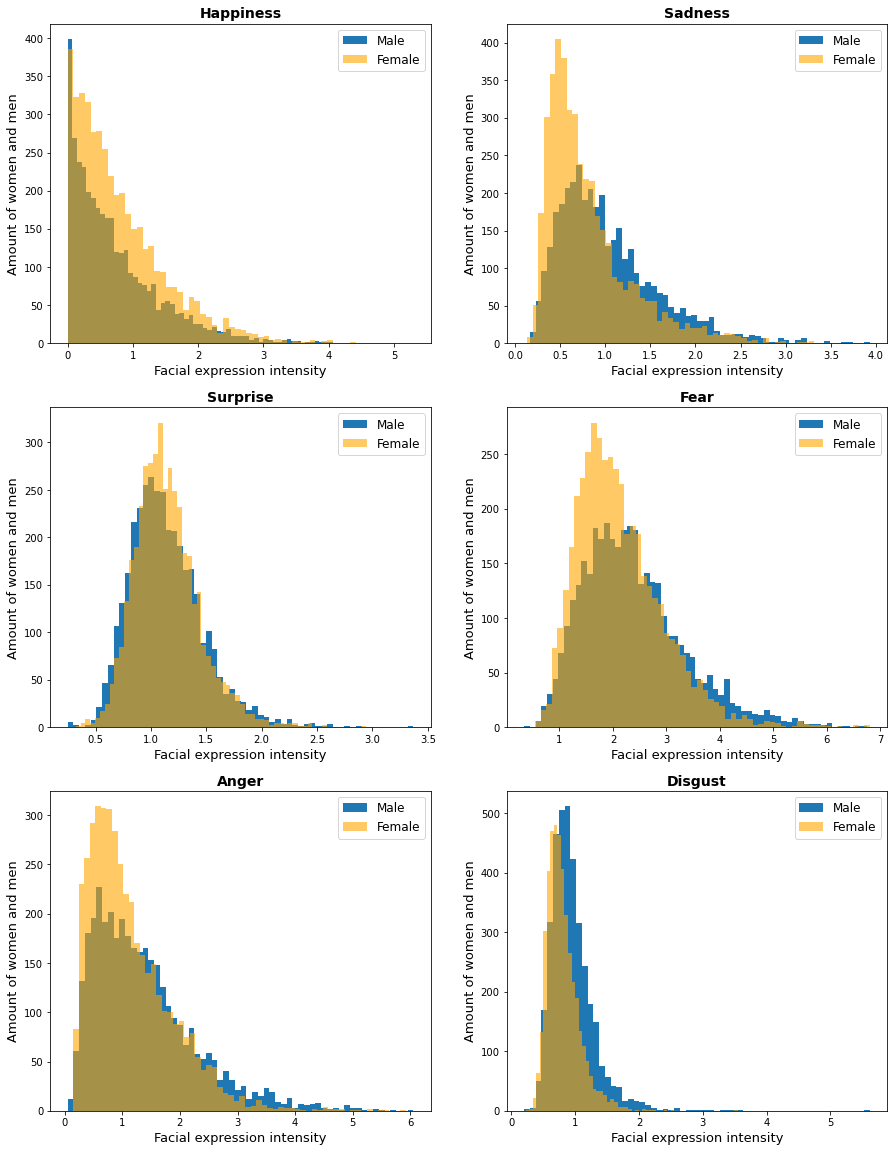

In [38]:
# Displaying distributions of gender per personality trait and the interview variable
cols = AU_dataframe[['Happiness', 'Sadness', 'Surprise', 'Fear', 'Anger', 'Disgust']]
fig = plt.figure(figsize = (15,20))
i = 0
for column in cols:
    i += 1
    fig.add_subplot(3, 2, i)
    plt.hist(AU_dataframe[AU_dataframe["gender"] == 1][column], label = "Male", bins = 60)
    plt.hist(AU_dataframe[AU_dataframe["gender"] == 2][column], label = "Female", bins = 60, alpha = 0.6, color= 'orange')
    plt.title(column.capitalize(), fontsize = 14, fontweight = "bold")
    plt.xlabel("Facial expression intensity", fontsize = 13)
    plt.ylabel("Amount of women and men", fontsize = 13)
    plt.legend(loc = "upper right", fontsize = "large")

In [39]:
print("Happiness: \nMen maximum = ", AU_dataframe[AU_dataframe["gender"] == 1]["Happiness"].max())
print("Women maximum = ", AU_dataframe[AU_dataframe["gender"] == 2]["Happiness"].max())
print()
print("Sadness: \nMen maximum = ", AU_dataframe[AU_dataframe["gender"] == 1]["Sadness"].max())
print("Women maximum = ", AU_dataframe[AU_dataframe["gender"] == 2]["Sadness"].max())
print()
print("Surprise: \nMen maximum = ", AU_dataframe[AU_dataframe["gender"] == 1]["Surprise"].max())
print("Women maximum = ", AU_dataframe[AU_dataframe["gender"] == 2]["Surprise"].max())
print()
print("Fear: \nMen maximum = ", AU_dataframe[AU_dataframe["gender"] == 1]["Fear"].max())
print("Women maximum = ", AU_dataframe[AU_dataframe["gender"] == 2]["Fear"].max())
print()
print("Anger: \nMen maximum = ", AU_dataframe[AU_dataframe["gender"] == 1]["Anger"].max())
print("Women maximum = ", AU_dataframe[AU_dataframe["gender"] == 2]["Anger"].max())
print()
print("Disgust: \nMen maximum = ", AU_dataframe[AU_dataframe["gender"] == 1]["Disgust"].max())
print("Women maximum = ", AU_dataframe[AU_dataframe["gender"] == 2]["Disgust"].max())

Happiness: 
Men maximum =  4.284151785714287
Women maximum =  5.300000000000001

Sadness: 
Men maximum =  3.934882506527412
Women maximum =  3.8766485013623995

Surprise: 
Men maximum =  3.3701449275362307
Women maximum =  2.9381735159817355

Fear: 
Men maximum =  6.745337690631808
Women maximum =  6.808304347826089

Anger: 
Men maximum =  6.05599128540305
Women maximum =  5.923173913043481

Disgust: 
Men maximum =  5.620501089324618
Women maximum =  3.5480392156862752


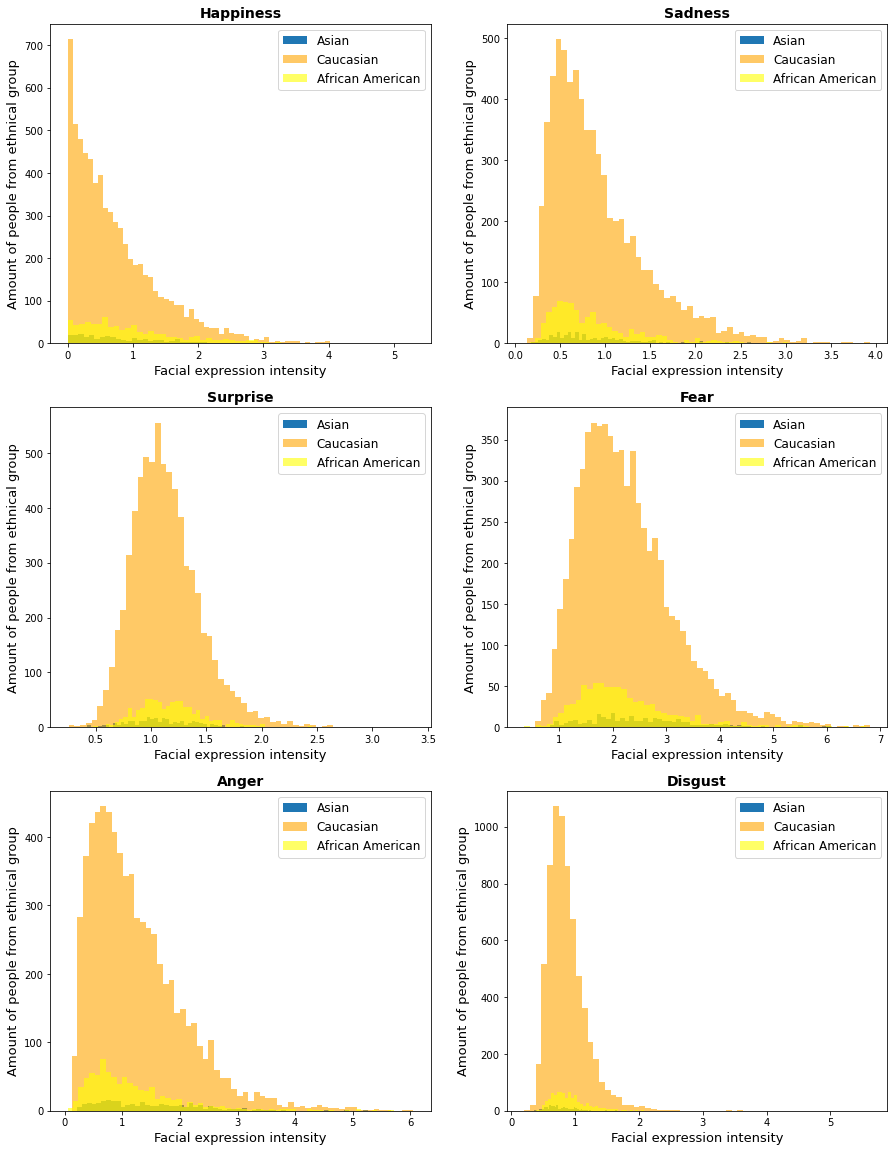

In [40]:
# Displaying distributions of gender per personality trait and the interview variable
cols = AU_dataframe[['Happiness', 'Sadness', 'Surprise', 'Fear', 'Anger', 'Disgust']]
fig = plt.figure(figsize = (15,20))
i = 0
for column in cols:
    i += 1
    fig.add_subplot(3, 2, i)
    plt.hist(AU_dataframe[AU_dataframe["ethnicity"] == 1][column], label = "Asian", bins = 60)
    plt.hist(AU_dataframe[AU_dataframe["ethnicity"] == 2][column], label = "Caucasian", bins = 60, alpha = 0.6, color= 'orange')
    plt.hist(AU_dataframe[AU_dataframe["ethnicity"] == 3][column], label = "African American", bins = 60, alpha = 0.6, color= 'yellow')
    plt.title(column.capitalize(), fontsize = 14, fontweight = "bold")
    plt.xlabel("Facial expression intensity", fontsize = 13)
    plt.ylabel("Amount of people from ethnical group", fontsize = 13)
    plt.legend(loc = "upper right", fontsize = "large")

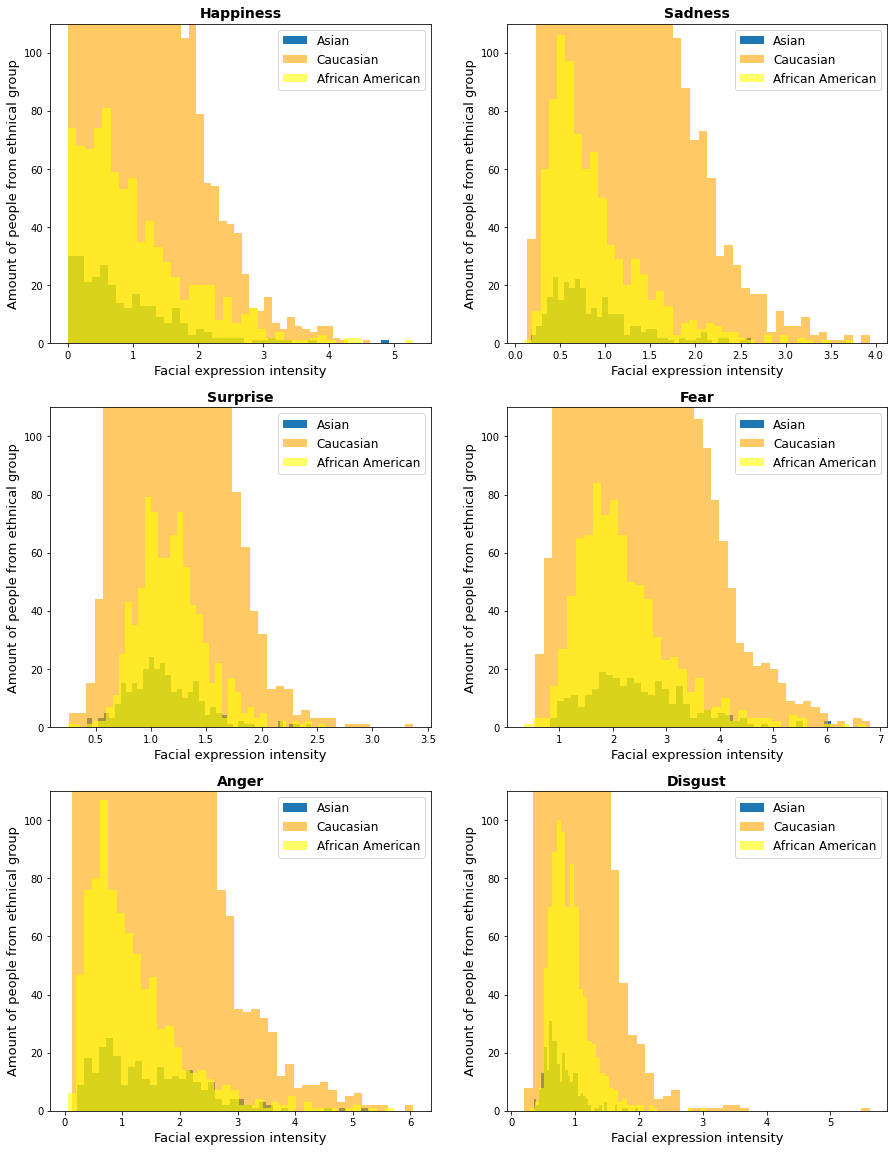

In [41]:
# A closer look
cols = AU_dataframe[['Happiness', 'Sadness', 'Surprise', 'Fear', 'Anger', 'Disgust']]
fig = plt.figure(figsize = (15,20))
i = 0
for column in cols:
    i += 1
    fig.add_subplot(3, 2, i)
    plt.hist(AU_dataframe[AU_dataframe["ethnicity"] == 1][column], label = "Asian", bins = 40)
    plt.hist(AU_dataframe[AU_dataframe["ethnicity"] == 2][column], label = "Caucasian", bins = 40, alpha = 0.6, color= 'orange')
    plt.hist(AU_dataframe[AU_dataframe["ethnicity"] == 3][column], label = "African American", bins = 40, alpha = 0.6, color= 'yellow')
    plt.title(column.capitalize(), fontsize = 14, fontweight = "bold")
    plt.xlabel("Facial expression intensity", fontsize = 13)
    plt.ylabel("Amount of people from ethnical group", fontsize = 13)
    plt.ylim(0, 110)
    plt.legend(loc = "upper right", fontsize = "large")

In [42]:
# Descriptives of the facial expressions of Asians
AU_dataframe[AU_dataframe["ethnicity"] == 1].describe()

,AU01_r_amplitude_mean,AU02_r_amplitude_mean,AU04_r_amplitude_mean,AU05_r_amplitude_mean,AU06_r_amplitude_mean,AU07_r_amplitude_mean,AU09_r_amplitude_mean,AU10_r_amplitude_mean,AU12_r_amplitude_mean,AU14_r_amplitude_mean,...,AU26_r_amplitude_mean,AU45_r_amplitude_mean,ethnicity,gender,Happiness,Sadness,Surprise,Fear,Anger,Disgust
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,...,283.000000,283.000000,283.0,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.326689,0.131732,0.376972,0.085425,0.366791,0.826986,0.096276,0.500350,0.526126,0.500879,...,0.573318,0.381073,1.0,1.710247,0.892917,0.876923,1.117163,2.456030,1.475656,0.780831
std,0.174469,0.071549,0.451476,0.043073,0.413275,0.672542,0.048127,0.514920,0.452789,0.494565,...,0.165447,0.165313,0.0,0.454451,0.763635,0.481313,0.320552,0.943311,0.881314,0.256243
min,0.045795,0.025926,0.000000,0.019717,0.000000,0.000000,0.024248,0.000000,0.000000,0.000000,...,0.244830,0.047821,1.0,1.000000,0.000065,0.177493,0.420632,0.816945,0.212658,0.348715
25%,0.212019,0.082721,0.042179,0.054139,0.084237,0.266344,0.064635,0.105576,0.148595,0.136762,...,0.441267,0.268515,1.0,1.000000,0.306187,0.523357,0.914583,1.783268,0.755694,0.611133
50%,0.293742,0.119412,0.195120,0.076314,0.244047,0.737262,0.085795,0.303943,0.381547,0.355123,...,0.555786,0.359504,1.0,2.000000,0.685969,0.756013,1.080813,2.346527,1.327081,0.719646
75%,0.405721,0.162614,0.588971,0.102246,0.490394,1.270442,0.110054,0.754749,0.830529,0.712627,...,0.685621,0.469314,1.0,2.000000,1.286008,1.095610,1.302971,3.021490,2.050690,0.911514
max,1.154902,0.647582,2.188932,0.287538,2.909582,2.855425,0.309368,2.276815,2.011619,2.760610,...,1.225298,0.898475,1.0,2.000000,4.921201,2.612789,2.448011,6.077233,5.265490,1.985911


In [43]:
# Descriptives of the facial expressions of Caucasians
AU_dataframe[AU_dataframe["ethnicity"] == 2].describe()

,AU01_r_amplitude_mean,AU02_r_amplitude_mean,AU04_r_amplitude_mean,AU05_r_amplitude_mean,AU06_r_amplitude_mean,AU07_r_amplitude_mean,AU09_r_amplitude_mean,AU10_r_amplitude_mean,AU12_r_amplitude_mean,AU14_r_amplitude_mean,...,AU26_r_amplitude_mean,AU45_r_amplitude_mean,ethnicity,gender,Happiness,Sadness,Surprise,Fear,Anger,Disgust
count,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,...,6870.000000,6870.000000,6870.0,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000,6870.000000
mean,0.336925,0.139866,0.388256,0.089298,0.278398,0.572112,0.099998,0.476237,0.470906,0.423063,...,0.568994,0.366823,2.0,1.519651,0.749304,0.922093,1.135082,2.234842,1.247991,0.869376
std,0.171610,0.069089,0.474764,0.044281,0.337339,0.555043,0.050211,0.490573,0.422712,0.427215,...,0.171329,0.152834,0.0,0.499650,0.678081,0.536789,0.306988,0.879654,0.807864,0.310144
min,0.045773,0.022636,0.000000,0.018083,0.000000,0.000000,0.017168,0.000000,0.000000,0.000000,...,0.141285,0.047821,2.0,1.000000,0.000000,0.134880,0.257124,0.545425,0.121046,0.200283
25%,0.217564,0.091939,0.043061,0.059134,0.035721,0.139771,0.067320,0.087979,0.135330,0.095641,...,0.451373,0.254649,2.0,1.000000,0.232625,0.530955,0.923342,1.594796,0.643109,0.665381
50%,0.296230,0.124630,0.203377,0.079121,0.148682,0.400534,0.088105,0.305490,0.362168,0.284789,...,0.548126,0.347038,2.0,2.000000,0.561155,0.778461,1.096288,2.094328,1.060165,0.810385
75%,0.418287,0.169041,0.565103,0.108810,0.398982,0.845809,0.117864,0.722086,0.694577,0.620501,...,0.662042,0.453904,2.0,2.000000,1.079472,1.172625,1.302658,2.713846,1.654743,1.001453
max,1.562702,0.880262,3.326275,0.546323,2.524641,3.890957,0.621699,3.011416,2.506875,2.760610,...,2.622077,1.527081,2.0,2.000000,4.639869,3.934883,3.370145,6.808304,6.055991,5.620501


In [44]:
# Descriptives of the facial expressions of African Americans
AU_dataframe[AU_dataframe["ethnicity"] == 3].describe()

,AU01_r_amplitude_mean,AU02_r_amplitude_mean,AU04_r_amplitude_mean,AU05_r_amplitude_mean,AU06_r_amplitude_mean,AU07_r_amplitude_mean,AU09_r_amplitude_mean,AU10_r_amplitude_mean,AU12_r_amplitude_mean,AU14_r_amplitude_mean,...,AU26_r_amplitude_mean,AU45_r_amplitude_mean,ethnicity,gender,Happiness,Sadness,Surprise,Fear,Anger,Disgust
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,...,847.000000,847.000000,847.0,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,0.347418,0.137122,0.331159,0.091859,0.399709,0.540317,0.110049,0.496737,0.619674,0.785597,...,0.603293,0.391919,3.0,1.683589,1.019383,0.886345,1.179692,2.203672,1.184289,0.914765
std,0.164039,0.061147,0.470396,0.044123,0.413566,0.556386,0.059742,0.460540,0.507496,0.521445,...,0.182595,0.158656,0.0,0.465350,0.840708,0.532658,0.306280,0.893474,0.832106,0.307479
min,0.045385,0.023055,0.000000,0.017385,0.000000,0.000000,0.023143,0.000000,0.000000,0.000000,...,0.161319,0.041429,3.0,1.000000,0.000000,0.101956,0.247143,0.339648,0.049714,0.297736
25%,0.228406,0.093658,0.023486,0.061122,0.093301,0.112390,0.073492,0.134553,0.220339,0.352113,...,0.482562,0.281079,3.0,1.000000,0.404474,0.514510,0.970959,1.597680,0.621471,0.704728
50%,0.314782,0.122888,0.131634,0.083211,0.254118,0.350675,0.095948,0.355359,0.498671,0.722309,...,0.575926,0.366054,3.0,2.000000,0.795577,0.726264,1.151786,2.035817,0.979765,0.857429
75%,0.426537,0.162908,0.433684,0.109204,0.553660,0.806684,0.127359,0.741118,0.913856,1.123660,...,0.699628,0.475460,3.0,2.000000,1.425562,1.080926,1.344004,2.627840,1.522223,1.042702
max,1.351307,0.584513,3.223551,0.337691,2.277039,3.542222,0.552462,2.117342,3.384815,2.719172,...,1.765965,0.990627,3.0,2.000000,5.300000,3.760370,2.568998,6.740850,5.710087,3.042076


<h1 align="center"> Predictions with OpenFace features</h1>

#### Models that will be trained:
- Model 1 = Job interview ~ Facial
- Model 2 = Job interview ~ Facial + Gender
- Model 3 = Job interview ~ Facial + Ethnicity
- Model 4 = Job interview ~ Facial + Gender + Ethnicity

## Model 1 - Interview ~ facial

#### Creating the training and validation (test) set for Model 1

In [45]:
# Creating the training set for Model 1, merging the new training dataset with
# a previously created dataset that contains 'interview', 'gender' and 'ethnicity'

df_int = merged_df[['videoname', 'interview']]
training_face = pd.merge(df_train, df_int, how = "left", on = ["videoname"])
#training_face.head()

In [46]:
# Creating the validation/ test set for Model 1
df_val_int = merged_val_df[['videoname', 'interview']]
val_face = pd.merge(df_val, df_val_int, how = "left", on = ["videoname"])
#val_face.head()

#### Regression preparations Model 1

In [47]:
# Splitting the (in)dependent variables
X_1_train = training_face.drop(['videoname', 'interview'], axis=1).values
y_1_train = training_face.loc[:,['interview']].values

# Splitting the (in)dependent variables of validation set
X_1_test = val_face.drop(['videoname', 'interview'], axis=1).values
y_1_test = val_face.loc[:,['interview']].values

#### Baseline prediction

In [48]:
# Creating a baseline by taking the MAE of the test set outcome variable and the mean of the training set outcome variable
1 - mean_absolute_error(y_1_test, np.full(2000, np.mean(y_1_train)))

0.8830107663551402

#### Multiple linear regression Model 1

In [49]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_1_train, y_1_train)

# -------------------------------------------------------
# Predicting the test set labels
y_1_pred = regressor.predict(X_1_test)

# -------------------------------------------------------
# Various performance measure scores

print("MSE {:.3}".format(mean_squared_error(y_1_test, y_1_pred)))
print("MAE {:.3}".format(mean_absolute_error(y_1_test, y_1_pred)))
print("1 - MAE {:.3}".format((1 - mean_absolute_error(y_1_test, y_1_pred))))

MSE 0.0292
MAE 0.101
1 - MAE 0.899


#### Feature importance

Code adapted from https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [50]:
# Checking the importance of the added variable(s)
importance = regressor.coef_.ravel()
for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))

Feature: 0, Score: 0.00561
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.21473
Feature: 3, Score: -0.00363
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.19894
Feature: 6, Score: -0.75471
Feature: 7, Score: 0.20148
Feature: 8, Score: 0.01604
Feature: 9, Score: -0.80042
Feature: 10, Score: -0.56201
Feature: 11, Score: -0.25391
Feature: 12, Score: 1.55644
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00022
Feature: 15, Score: 0.00008
Feature: 16, Score: 0.08049
Feature: 17, Score: 0.01543
Feature: 18, Score: -0.06251
Feature: 19, Score: 0.00246
Feature: 20, Score: -0.06866
Feature: 21, Score: 0.00204
Feature: 22, Score: 0.04699
Feature: 23, Score: -0.00237
Feature: 24, Score: 0.00462
Feature: 25, Score: 0.25508
Feature: 26, Score: 0.02053
Feature: 27, Score: -0.00554
Feature: 28, Score: 0.05553
Feature: 29, Score: -0.13140
Feature: 30, Score: 0.01573
Feature: 31, Score: 0.10742
Feature: 32, Score: 0.15533
Feature: 33, Score: 0.07980
Feature: 34, Score: 0.04808
Feature: 35, Score:

In [51]:
# The minimum and maximum feature importance
print(importance.min())
print(importance.max())
importance[-1]

-217.45759246549807
147.05998846251677


-0.09625861299751597

In [52]:
# PCA for linear regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    X_1_train_mlr_PCA = pca.fit_transform(X_1_train)
    X_1_test_mlr_PCA = pca.transform(X_1_test)
    
    regressor.fit(X_1_train_mlr_PCA, y_1_train)
    mlr_y_1_PCA = regressor.predict(X_1_test_mlr_PCA)
    print("MLR with", component, "components, MSE Model 1 = {:.3}".format(mean_squared_error(y_1_test, mlr_y_1_PCA)))
    print("MLR with", component, "components, MAE Model 1 = {:.3}".format(mean_absolute_error(y_1_test, mlr_y_1_PCA)))
    print("MLR with", component, "components, 1 - MAE Model 1 = {:.3}".format(1-mean_absolute_error(y_1_test, mlr_y_1_PCA)))
    print("-------------------------------------------")

MLR with 50 components, MSE Model 1 = 0.0366
MLR with 50 components, MAE Model 1 = 0.11
MLR with 50 components, 1 - MAE Model 1 = 0.89
-------------------------------------------
MLR with 100 components, MSE Model 1 = 0.0535
MLR with 100 components, MAE Model 1 = 0.107
MLR with 100 components, 1 - MAE Model 1 = 0.893
-------------------------------------------
MLR with 200 components, MSE Model 1 = 0.0421
MLR with 200 components, MAE Model 1 = 0.105
MLR with 200 components, 1 - MAE Model 1 = 0.895
-------------------------------------------
MLR with 300 components, MSE Model 1 = 0.0234
MLR with 300 components, MAE Model 1 = 0.102
MLR with 300 components, 1 - MAE Model 1 = 0.898
-------------------------------------------
MLR with 400 components, MSE Model 1 = 0.0385
MLR with 400 components, MAE Model 1 = 0.104
MLR with 400 components, 1 - MAE Model 1 = 0.896
-------------------------------------------
MLR with 500 components, MSE Model 1 = 0.0301
MLR with 500 components, MAE Model 1 = 

#### Random forest regression Model 1

In [53]:
# Random forest regression

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_1_train, y_1_train.ravel())

# Using .ravel() to get the correct format
rfr_y_1 = rfr.predict(X_1_test)
print("MSE {:.3}".format(mean_squared_error(y_1_test, rfr_y_1)))
print("MAE {:.3}".format(mean_absolute_error(y_1_test, rfr_y_1)))
print("1 - MAE {:.3}".format((1-mean_absolute_error(y_1_test, rfr_y_1))))

MSE 0.0157
MAE 0.1
1 - MAE 0.9


In [54]:
# PCA for random forest regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    rfr_X_1_train_PCA = pca.fit_transform(X_1_train)
    rfr_X_1_test_PCA = pca.transform(X_1_test)
    
    rfr.fit(rfr_X_1_train_PCA, y_1_train.ravel())
    rfr_y_1_PCA = rfr.predict(rfr_X_1_test_PCA)
    print("RFR with", component, "components, MSE Model 1 = {:.3}".format(mean_squared_error(y_1_test, rfr_y_1_PCA)))
    print("RFR with", component, "components, MAE Model 1 = {:.3}".format(mean_absolute_error(y_1_test, rfr_y_1_PCA)))
    print("RFR with", component, "components, 1 - MAE Model 1 = {:.3}".format(1-mean_absolute_error(y_1_test, rfr_y_1_PCA)))
    print("-------------------------------------------")

RFR with 50 components, MSE Model 1 = 0.0179
RFR with 50 components, MAE Model 1 = 0.107
RFR with 50 components, 1 - MAE Model 1 = 0.893
-------------------------------------------
RFR with 100 components, MSE Model 1 = 0.018
RFR with 100 components, MAE Model 1 = 0.108
RFR with 100 components, 1 - MAE Model 1 = 0.892
-------------------------------------------
RFR with 200 components, MSE Model 1 = 0.0182
RFR with 200 components, MAE Model 1 = 0.107
RFR with 200 components, 1 - MAE Model 1 = 0.893
-------------------------------------------
RFR with 300 components, MSE Model 1 = 0.0188
RFR with 300 components, MAE Model 1 = 0.11
RFR with 300 components, 1 - MAE Model 1 = 0.89
-------------------------------------------
RFR with 400 components, MSE Model 1 = 0.0182
RFR with 400 components, MAE Model 1 = 0.109
RFR with 400 components, 1 - MAE Model 1 = 0.891
-------------------------------------------
RFR with 500 components, MSE Model 1 = 0.0187
RFR with 500 components, MAE Model 1 = 0

#### Support vector regression Model 1

In [55]:
# Scaling the features
# X
X_sc = StandardScaler()
X_1_train_scale = X_sc.fit_transform(X_1_train)
X_1_test_scale = X_sc.transform(X_1_test)

In [56]:
%%time
svr = SVR(kernel = 'rbf')
svr.fit(X_1_train_scale, y_1_train.ravel())
svr_y_1 = svr.predict(X_1_test_scale)

print("MSE {:.3}".format(mean_squared_error(y_1_test, svr_y_1)))
print("MAE {:.3}".format(mean_absolute_error(y_1_test, svr_y_1)))
print("1 - MAE {:.3}".format(1-(mean_absolute_error(y_1_test, svr_y_1))))

MSE 0.0148
MAE 0.0971
1 - MAE 0.903
Wall time: 17.9 s


In [57]:
# PCA for support vector regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    X_1_train_PCA = pca.fit_transform(X_1_train_scale)
    X_1_test_PCA = pca.transform(X_1_test_scale)
    
    svr.fit(X_1_train_PCA, y_1_train.ravel())
    svr_y_1_PCA = svr.predict(X_1_test_PCA)
    print("SVR with", component, "components, MSE Model 1 = {:.3}".format(mean_squared_error(y_1_test, svr_y_1_PCA)))
    print("SVR with", component, "components, MAE Model 1 = {:.3}".format(mean_absolute_error(y_1_test, svr_y_1_PCA)))
    print("SVR with", component, "components, 1 - MAE Model 1 = {:.3}".format(1-mean_absolute_error(y_1_test, svr_y_1_PCA)))
    print("-------------------------------------------")

SVR with 50 components, MSE Model 1 = 0.0158
SVR with 50 components, MAE Model 1 = 0.1
SVR with 50 components, 1 - MAE Model 1 = 0.9
-------------------------------------------
SVR with 100 components, MSE Model 1 = 0.0153
SVR with 100 components, MAE Model 1 = 0.0981
SVR with 100 components, 1 - MAE Model 1 = 0.902
-------------------------------------------
SVR with 200 components, MSE Model 1 = 0.0152
SVR with 200 components, MAE Model 1 = 0.0981
SVR with 200 components, 1 - MAE Model 1 = 0.902
-------------------------------------------
SVR with 300 components, MSE Model 1 = 0.015
SVR with 300 components, MAE Model 1 = 0.0975
SVR with 300 components, 1 - MAE Model 1 = 0.902
-------------------------------------------
SVR with 400 components, MSE Model 1 = 0.0149
SVR with 400 components, MAE Model 1 = 0.0974
SVR with 400 components, 1 - MAE Model 1 = 0.903
-------------------------------------------
SVR with 500 components, MSE Model 1 = 0.0148
SVR with 500 components, MAE Model 1 =

-----------

## Model 2 - Interview ~ facial + gender

#### Creating the training and validation (test) set for Model 2

In [58]:
# Creating the training set for Model 2, merging the new training dataset with
# a previously created dataset that contains 'interview', 'gender' and 'ethnicity'

df_gen_int = merged_df[['videoname', 'gender', 'interview']]
training_face_gen = pd.merge(df_train, df_gen_int, how = "left", on = ["videoname"])
#training_face_gen.head()

In [59]:
# Creating the validation/ test set for Model 2
df_val_gen_int = merged_val_df[['videoname', 'gender', 'interview']]
val_face_gen = pd.merge(df_val, df_val_gen_int, how = "left", on = ["videoname"])
#val_face_gen.head()

#### Regression preparations Model 2

In [60]:
%%time

# Splitting the (in)dependent variables
X_2_train = training_face_gen.drop(['videoname','interview'], axis=1).values
y_2_train = training_face_gen.loc[:,['interview']].values

# Splitting the (in)dependent variables of validation set
X_2_test = val_face_gen.drop(['videoname', 'interview'], axis=1).values
y_2_test = val_face_gen.loc[:,['interview']].values

# -------------------------------------------------------
# Make a dummy variable of the categorical values of gender
le = LabelEncoder()
X_2_train[:, -1] = le.fit_transform(X_2_train[:, -1])
X_2_test[:, -1] = le.fit_transform(X_2_test[:, -1])

Wall time: 111 ms


#### Multiple linear regression Model 2

In [61]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_2_train, y_2_train)

# -------------------------------------------------------
# Predicting the test set labels
y_2_pred = regressor.predict(X_2_test)

# -------------------------------------------------------
# Various performance measure scores

print("MSE {:.3}".format(mean_squared_error(y_2_test, y_2_pred)))
print("MAE {:.3}".format(mean_absolute_error(y_2_test, y_2_pred)))
print("1 - MAE {:.3}".format((1 - mean_absolute_error(y_2_test, y_2_pred))))

MSE 0.0254
MAE 0.101
1 - MAE 0.899


#### Feature importance

Code adapted from https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [62]:
# Checking the importance of the added variable(s)
importance = regressor.coef_.ravel()
for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))

Feature: 0, Score: 0.00502
Feature: 1, Score: 5559424408.32846
Feature: 2, Score: -0.20456
Feature: 3, Score: 0.21849
Feature: 4, Score: 28772316498.41384
Feature: 5, Score: 0.19169
Feature: 6, Score: -0.83089
Feature: 7, Score: 0.05843
Feature: 8, Score: 0.00491
Feature: 9, Score: -0.95110
Feature: 10, Score: -0.51650
Feature: 11, Score: -0.22262
Feature: 12, Score: 1.80268
Feature: 13, Score: 0.00007
Feature: 14, Score: 0.00030
Feature: 15, Score: 0.00009
Feature: 16, Score: 0.07850
Feature: 17, Score: 0.01242
Feature: 18, Score: -0.06506
Feature: 19, Score: 0.00408
Feature: 20, Score: -0.06408
Feature: 21, Score: 0.00279
Feature: 22, Score: 0.06504
Feature: 23, Score: -0.00297
Feature: 24, Score: 0.00490
Feature: 25, Score: 0.25902
Feature: 26, Score: 0.01983
Feature: 27, Score: -0.00302
Feature: 28, Score: 0.05528
Feature: 29, Score: -0.13295
Feature: 30, Score: 0.01258
Feature: 31, Score: 0.10827
Feature: 32, Score: 0.15362
Feature: 33, Score: 0.08273
Feature: 34, Score: 0.04970
F

In [63]:
# The minimum and maximum feature importance
print(importance.min())
print(importance.max())
importance[-1]

-272870786.46064144
28772316498.413837


-0.007503639906644821

In [64]:
# PCA for linear regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    X_2_train_mlr_PCA = pca.fit_transform(X_2_train)
    X_2_test_mlr_PCA = pca.transform(X_2_test)
    
    regressor.fit(X_2_train_mlr_PCA, y_2_train)
    mlr_y_2_PCA = regressor.predict(X_2_test_mlr_PCA)
    print("MLR with", component, "components, MSE Model 2 = {:.3}".format(mean_squared_error(y_2_test, mlr_y_2_PCA)))
    print("MLR with", component, "components, MAE Model 2 = {:.3}".format(mean_absolute_error(y_2_test, mlr_y_2_PCA)))
    print("MLR with", component, "components, 1 - MAE Model 2 = {:.3}".format(1-mean_absolute_error(y_2_test, mlr_y_2_PCA)))
    print("-------------------------------------------")

MLR with 50 components, MSE Model 2 = 0.0378
MLR with 50 components, MAE Model 2 = 0.11
MLR with 50 components, 1 - MAE Model 2 = 0.89
-------------------------------------------
MLR with 100 components, MSE Model 2 = 0.0547
MLR with 100 components, MAE Model 2 = 0.107
MLR with 100 components, 1 - MAE Model 2 = 0.893
-------------------------------------------
MLR with 200 components, MSE Model 2 = 0.0417
MLR with 200 components, MAE Model 2 = 0.105
MLR with 200 components, 1 - MAE Model 2 = 0.895
-------------------------------------------
MLR with 300 components, MSE Model 2 = 0.0232
MLR with 300 components, MAE Model 2 = 0.102
MLR with 300 components, 1 - MAE Model 2 = 0.898
-------------------------------------------
MLR with 400 components, MSE Model 2 = 0.0387
MLR with 400 components, MAE Model 2 = 0.103
MLR with 400 components, 1 - MAE Model 2 = 0.897
-------------------------------------------
MLR with 500 components, MSE Model 2 = 0.0302
MLR with 500 components, MAE Model 2 = 

#### Random forest regression Model 2

In [65]:
# Random forest regression

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_2_train, y_2_train.ravel())

# Using .ravel() to get the correct format
rfr_y_2 = rfr.predict(X_2_test)
print("MSE {:.3}".format(mean_squared_error(y_2_test, rfr_y_2)))
print("MAE {:.3}".format(mean_absolute_error(y_2_test, rfr_y_2)))
print("1 - MAE {:.3}".format((1-mean_absolute_error(y_2_test, rfr_y_2))))

MSE 0.016
MAE 0.101
1 - MAE 0.899


In [66]:
# PCA for random forest regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    rfr_X_2_train_PCA = pca.fit_transform(X_2_train)
    rfr_X_2_test_PCA = pca.transform(X_2_test)
    
    rfr.fit(rfr_X_2_train_PCA, y_2_train.ravel())
    rfr_y_2_PCA = rfr.predict(rfr_X_2_test_PCA)
    print("RFR with", component, "components, MSE Model 2 = {:.3}".format(mean_squared_error(y_2_test, rfr_y_2_PCA)))
    print("RFR with", component, "components, MAE Model 2 = {:.3}".format(mean_absolute_error(y_2_test, rfr_y_2_PCA)))
    print("RFR with", component, "components, 1 - MAE Model 2 = {:.3}".format(1-mean_absolute_error(y_2_test, rfr_y_2_PCA)))
    print("-------------------------------------------")

RFR with 50 components, MSE Model 2 = 0.0177
RFR with 50 components, MAE Model 2 = 0.107
RFR with 50 components, 1 - MAE Model 2 = 0.893
-------------------------------------------
RFR with 100 components, MSE Model 2 = 0.0183
RFR with 100 components, MAE Model 2 = 0.108
RFR with 100 components, 1 - MAE Model 2 = 0.892
-------------------------------------------
RFR with 200 components, MSE Model 2 = 0.0184
RFR with 200 components, MAE Model 2 = 0.109
RFR with 200 components, 1 - MAE Model 2 = 0.891
-------------------------------------------
RFR with 300 components, MSE Model 2 = 0.0183
RFR with 300 components, MAE Model 2 = 0.109
RFR with 300 components, 1 - MAE Model 2 = 0.891
-------------------------------------------
RFR with 400 components, MSE Model 2 = 0.0185
RFR with 400 components, MAE Model 2 = 0.11
RFR with 400 components, 1 - MAE Model 2 = 0.89
-------------------------------------------
RFR with 500 components, MSE Model 2 = 0.0188
RFR with 500 components, MAE Model 2 = 

#### Support vector regression Model 2

In [67]:
# Scaling the features
# X
X_sc = StandardScaler()

# Copying the sets to be able to perform feature scaling on every feature but the gender dummies
X_2_train_scale = X_2_train.copy()
X_2_test_scale = X_2_test.copy()

X_2_train_scale[:, :-1] = X_sc.fit_transform(X_2_train[:, :-1])
X_2_test_scale[:, :-1] = X_sc.transform(X_2_test[:, :-1])

In [68]:
%%time
# Support vector regression

svr = SVR(kernel = 'rbf')
svr.fit(X_2_train_scale, y_2_train.ravel())
svr_y_2 = svr.predict(X_2_test_scale)

print("MSE {:.3}".format(mean_squared_error(y_2_test, svr_y_2)))
print("MAE {:.3}".format(mean_absolute_error(y_2_test, svr_y_2)))
print("1 - MAE {:.3}".format(1-(mean_absolute_error(y_2_test, svr_y_2))))

MSE 0.0148
MAE 0.0971
1 - MAE 0.903
Wall time: 17.8 s


In [69]:
# PCA for support vector regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    X_2_train_PCA = pca.fit_transform(X_2_train_scale)
    X_2_test_PCA = pca.transform(X_2_test_scale)
    
    svr.fit(X_2_train_PCA, y_2_train.ravel())
    svr_y_2_PCA = svr.predict(X_2_test_PCA)
    print("SVR with", component, "components, MSE Model 2 = {:.3}".format(mean_squared_error(y_2_test, svr_y_2_PCA)))
    print("SVR with", component, "components, MAE Model 2 = {:.3}".format(mean_absolute_error(y_2_test, svr_y_2_PCA)))
    print("SVR with", component, "components, 1 - MAE Model 2 = {:.3}".format(1-mean_absolute_error(y_2_test, svr_y_2_PCA)))
    print("-------------------------------------------")

SVR with 50 components, MSE Model 2 = 0.0158
SVR with 50 components, MAE Model 2 = 0.101
SVR with 50 components, 1 - MAE Model 2 = 0.899
-------------------------------------------
SVR with 100 components, MSE Model 2 = 0.0154
SVR with 100 components, MAE Model 2 = 0.0985
SVR with 100 components, 1 - MAE Model 2 = 0.901
-------------------------------------------
SVR with 200 components, MSE Model 2 = 0.0152
SVR with 200 components, MAE Model 2 = 0.098
SVR with 200 components, 1 - MAE Model 2 = 0.902
-------------------------------------------
SVR with 300 components, MSE Model 2 = 0.015
SVR with 300 components, MAE Model 2 = 0.0974
SVR with 300 components, 1 - MAE Model 2 = 0.903
-------------------------------------------
SVR with 400 components, MSE Model 2 = 0.0149
SVR with 400 components, MAE Model 2 = 0.0974
SVR with 400 components, 1 - MAE Model 2 = 0.903
-------------------------------------------
SVR with 500 components, MSE Model 2 = 0.0148
SVR with 500 components, MAE Model 

-----------

## Model 3 - Interview ~ facial + ethnicity

#### Creating the training and validation (test) set for Model 3

In [70]:
# Creating the training set for Model 3, merging the new training dataset with
# a previously created dataset that contains 'interview', 'gender' and 'ethnicity'

df_eth_int = merged_df[['videoname', 'ethnicity', 'interview']]
training_face_eth = pd.merge(df_train, df_eth_int, how = "left", on = ["videoname"])
#training_face_eth.head()

In [71]:
# Creating the validation/ test set for Model 3
df_val_eth_int = merged_val_df[['videoname', 'ethnicity', 'interview']]
val_face_eth = pd.merge(df_val, df_val_eth_int, how = "left", on = ["videoname"])
#val_face_eth.head()

#### Regression preparations Model 3

In [72]:
%%time
# Splitting the (in)dependent variables
X_3_train = training_face_eth.drop(['videoname', 'interview'], axis=1).values
y_3_train = training_face_eth.loc[:,['interview']].values

# Splitting the (in)dependent variables of validation set
X_3_test = val_face_eth.drop(['videoname', 'interview'], axis=1).values
y_3_test = val_face_eth.loc[:,['interview']].values

# -------------------------------------------------------
# Make a dummy variable of the categorical values of ethnicity
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_3_train = np.array(ct.fit_transform(X_3_train))
X_3_test = np.array(ct.fit_transform(X_3_test))

# -------------------------------------------------------
# Avoid dummy trap
X_3_train_dummy = X_3_train.copy()
X_3_train_dummy = X_3_train_dummy[:,1:]

X_3_test_dummy = X_3_test.copy()
X_3_test_dummy = X_3_test_dummy[:,1:]

Wall time: 277 ms


#### Multiple linear regression Model 3

In [73]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_3_train_dummy, y_3_train)

# -------------------------------------------------------
# Predicting the test set labels
y_3_pred = regressor.predict(X_3_test_dummy)

# -------------------------------------------------------
# Various performance measure scores

print("MSE {:.3}".format(mean_squared_error(y_3_test, y_3_pred)))
print("MAE {:.3}".format(mean_absolute_error(y_3_test, y_3_pred)))
print("1 - MAE {:.3}".format((1-mean_absolute_error(y_3_test, y_3_pred))))

MSE 0.0307
MAE 0.102
1 - MAE 0.898


#### Feature importance

Code adapted from https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [74]:
# Checking the importance of the added variable(s)
importance = regressor.coef_.ravel()
for i,j in enumerate(importance):
    #if j > 10 or j < -10:
    print('Feature: %0d, Score: %.5f' % (i,j))

Feature: 0, Score: -0.02643
Feature: 1, Score: -0.05497
Feature: 2, Score: 0.00709
Feature: 3, Score: -507945340.10695
Feature: 4, Score: -0.26112
Feature: 5, Score: -0.00312
Feature: 6, Score: -430139912.47887
Feature: 7, Score: 0.19689
Feature: 8, Score: -0.79318
Feature: 9, Score: 0.16036
Feature: 10, Score: 0.03414
Feature: 11, Score: -0.81862
Feature: 12, Score: -0.51509
Feature: 13, Score: -0.25963
Feature: 14, Score: 1.61808
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00018
Feature: 17, Score: 0.00008
Feature: 18, Score: 0.06304
Feature: 19, Score: 0.01467
Feature: 20, Score: -0.05810
Feature: 21, Score: 0.00065
Feature: 22, Score: -0.06201
Feature: 23, Score: 0.00200
Feature: 24, Score: 0.04411
Feature: 25, Score: -0.00521
Feature: 26, Score: 0.00457
Feature: 27, Score: 0.26996
Feature: 28, Score: 0.01956
Feature: 29, Score: -0.00572
Feature: 30, Score: 0.05705
Feature: 31, Score: -0.13649
Feature: 32, Score: 0.01313
Feature: 33, Score: 0.14380
Feature: 34, Score: 0.17287

In [75]:
# The minimum and maximum feature importance
print(importance.min())
print(importance.max())
importance[-1]

-507945340.1069534
105255.79301787948


-0.0991121024126187

In [76]:
# PCA for linear regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    X_3_train_mlr_PCA = pca.fit_transform(X_3_train_dummy)
    X_3_test_mlr_PCA = pca.transform(X_3_test_dummy)
    
    regressor.fit(X_3_train_mlr_PCA, y_3_train)
    mlr_y_3_PCA = regressor.predict(X_3_test_mlr_PCA)
    print("MLR with", component, "components, MSE Model 3 = {:.3}".format(mean_squared_error(y_3_test, mlr_y_3_PCA)))
    print("MLR with", component, "components, MAE Model 3 = {:.3}".format(mean_absolute_error(y_3_test, mlr_y_3_PCA)))
    print("MLR with", component, "components, 1 - MAE Model 3 = {:.3}".format(1-mean_absolute_error(y_3_test, mlr_y_3_PCA)))
    print("-------------------------------------------")

MLR with 50 components, MSE Model 3 = 0.0363
MLR with 50 components, MAE Model 3 = 0.11
MLR with 50 components, 1 - MAE Model 3 = 0.89
-------------------------------------------
MLR with 100 components, MSE Model 3 = 0.0578
MLR with 100 components, MAE Model 3 = 0.107
MLR with 100 components, 1 - MAE Model 3 = 0.893
-------------------------------------------
MLR with 200 components, MSE Model 3 = 0.0476
MLR with 200 components, MAE Model 3 = 0.106
MLR with 200 components, 1 - MAE Model 3 = 0.894
-------------------------------------------
MLR with 300 components, MSE Model 3 = 0.0241
MLR with 300 components, MAE Model 3 = 0.102
MLR with 300 components, 1 - MAE Model 3 = 0.898
-------------------------------------------
MLR with 400 components, MSE Model 3 = 0.0408
MLR with 400 components, MAE Model 3 = 0.104
MLR with 400 components, 1 - MAE Model 3 = 0.896
-------------------------------------------
MLR with 500 components, MSE Model 3 = 0.0318
MLR with 500 components, MAE Model 3 = 

#### Random forest regression Model 3

In [77]:
# Random forest regression

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_3_train_dummy, y_3_train.ravel())

# Using .ravel() to get the correct format
rfr_y_3 = rfr.predict(X_3_test_dummy)
print("MSE {:.3}".format(mean_squared_error(y_3_test, rfr_y_3)))
print("MAE {:.3}".format(mean_absolute_error(y_3_test, rfr_y_3)))
print("1 - MAE {:.3}".format((1 - mean_absolute_error(y_3_test, rfr_y_3))))

MSE 0.0158
MAE 0.101
1 - MAE 0.899


In [78]:
# PCA for random forest regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    rfr_X_3_train_PCA = pca.fit_transform(X_3_train_dummy)
    rfr_X_3_test_PCA = pca.transform(X_3_test_dummy)
    
    rfr.fit(rfr_X_3_train_PCA, y_3_train.ravel())
    rfr_y_3_PCA = rfr.predict(rfr_X_3_test_PCA)
    print("RFR with", component, "components, MSE Model 3 = {:.3}".format(mean_squared_error(y_3_test, rfr_y_3_PCA)))
    print("RFR with", component, "components, MAE Model 3 = {:.3}".format(mean_absolute_error(y_3_test, rfr_y_3_PCA)))
    print("RFR with", component, "components, 1 - MAE Model 3 = {:.3}".format(1-mean_absolute_error(y_3_test, rfr_y_3_PCA)))
    print("-------------------------------------------")

RFR with 50 components, MSE Model 3 = 0.0181
RFR with 50 components, MAE Model 3 = 0.108
RFR with 50 components, 1 - MAE Model 3 = 0.892
-------------------------------------------
RFR with 100 components, MSE Model 3 = 0.0181
RFR with 100 components, MAE Model 3 = 0.108
RFR with 100 components, 1 - MAE Model 3 = 0.892
-------------------------------------------
RFR with 200 components, MSE Model 3 = 0.0187
RFR with 200 components, MAE Model 3 = 0.11
RFR with 200 components, 1 - MAE Model 3 = 0.89
-------------------------------------------
RFR with 300 components, MSE Model 3 = 0.0188
RFR with 300 components, MAE Model 3 = 0.11
RFR with 300 components, 1 - MAE Model 3 = 0.89
-------------------------------------------
RFR with 400 components, MSE Model 3 = 0.0188
RFR with 400 components, MAE Model 3 = 0.11
RFR with 400 components, 1 - MAE Model 3 = 0.89
-------------------------------------------
RFR with 500 components, MSE Model 3 = 0.019
RFR with 500 components, MAE Model 3 = 0.111

#### Support vector regression Model 3

In [79]:
# Scaling the features
# X
X_sc = StandardScaler()

# Copying the sets to be able to perform feature scaling on every feature but the ethnicity dummies
X_3_train_scale = X_3_train_dummy.copy()
X_3_test_scale = X_3_test_dummy.copy()

X_3_train_scale[:, 2:] = X_sc.fit_transform(X_3_train_dummy[:, 2:])
X_3_test_scale[:, 2:] = X_sc.transform(X_3_test_dummy[:, 2:])

In [80]:
%%time
# Support vectore regression

svr = SVR(kernel = 'rbf')
svr.fit(X_3_train_scale, y_3_train.ravel())
svr_y_3 = svr.predict(X_3_test_scale)

print("MSE {:.3}".format(mean_squared_error(y_3_test, svr_y_3)))
print("MAE {:.3}".format(mean_absolute_error(y_3_test, svr_y_3)))
print("1 - MAE {:.3}".format((1-mean_absolute_error(y_3_test, svr_y_3))))

MSE 0.0148
MAE 0.097
1 - MAE 0.903
Wall time: 17.8 s


In [81]:
%%time
# PCA for support vector regression
components = [50, 100, 200, 300, 400, 500]
    
for component in components:
    pca = PCA(n_components = component)   
    X_3_train_PCA = pca.fit_transform(X_3_train_scale)
    X_3_test_PCA = pca.transform(X_3_test_scale)
    
    svr.fit(X_3_train_PCA, y_3_train.ravel())
    svr_y_3_PCA = svr.predict(X_3_test_PCA)
    print("SVR with", component, "components, MSE Model 3 = {:.3}".format(mean_squared_error(y_3_test, svr_y_3_PCA)))
    print("SVR with", component, "components, MAE Model 3 = {:.3}".format(mean_absolute_error(y_3_test, svr_y_3_PCA)))
    print("SVR with", component, "components, 1 - MAE Model 3 = {:.3}".format(1-mean_absolute_error(y_3_test, svr_y_3_PCA)))
    print("-------------------------------------------")

SVR with 50 components, MSE Model 3 = 0.0159
SVR with 50 components, MAE Model 3 = 0.101
SVR with 50 components, 1 - MAE Model 3 = 0.899
-------------------------------------------
SVR with 100 components, MSE Model 3 = 0.0153
SVR with 100 components, MAE Model 3 = 0.0981
SVR with 100 components, 1 - MAE Model 3 = 0.902
-------------------------------------------
SVR with 200 components, MSE Model 3 = 0.0151
SVR with 200 components, MAE Model 3 = 0.0979
SVR with 200 components, 1 - MAE Model 3 = 0.902
-------------------------------------------
SVR with 300 components, MSE Model 3 = 0.015
SVR with 300 components, MAE Model 3 = 0.0975
SVR with 300 components, 1 - MAE Model 3 = 0.903
-------------------------------------------
SVR with 400 components, MSE Model 3 = 0.0149
SVR with 400 components, MAE Model 3 = 0.0972
SVR with 400 components, 1 - MAE Model 3 = 0.903
-------------------------------------------
SVR with 500 components, MSE Model 3 = 0.0148
SVR with 500 components, MAE Model

-----------

## Model 4 - Interview ~ facial + gender + ethnicity

#### Creating the training and validation (test) set for Model 4

In [82]:
# Creating the training set for Model 4, merging the new training dataset with
# a previously created dataset that contains 'interview', 'gender' and 'ethnicity'

df_gen_eth_int = merged_df[['videoname', 'ethnicity', 'gender', 'interview']]
training_face_gen_eth = pd.merge(df_train, df_gen_eth_int, how = "left", on = ["videoname"])
#training_face_gen_eth.head()

In [83]:
# Creating the validation/ test set for Model 4
df_val_gen_eth_int = merged_val_df[['videoname', 'ethnicity', 'gender', 'interview']]
val_face_gen_eth = pd.merge(df_val, df_val_gen_eth_int, how = "left", on = ["videoname"])
#val_face_gen_eth.head()

#### Regression preparations Model 4

In [84]:
%%time

# Splitting the (in)dependent variables
X_4_train = training_face_gen_eth.drop(['videoname', 'interview'], axis=1).values
y_4_train = training_face_gen_eth.loc[:,['interview']].values

# Splitting the (in)dependent variables of validation set
X_4_test = val_face_gen_eth.drop(['videoname', 'interview'], axis=1).values
y_4_test = val_face_gen_eth.loc[:,['interview']].values

# -------------------------------------------------------
# Make a dummy variable of the categorical values of gender
le = LabelEncoder()
X_4_train[:, -1] = le.fit_transform(X_4_train[:, -1])
X_4_test[:, -1] = le.fit_transform(X_4_test[:, -1])

# -------------------------------------------------------
# Make a dummy variable of the categorical values of ethnicity
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
X_4_train = np.array(ct.fit_transform(X_4_train))
X_4_test = np.array(ct.fit_transform(X_4_test))

# -------------------------------------------------------
# Avoid dummy trap
X_4_train_dummy = X_4_train.copy()
X_4_train_dummy = X_4_train_dummy[:,1:]

X_4_test_dummy = X_4_test.copy()
X_4_test_dummy = X_4_test_dummy[:,1:]

Wall time: 278 ms


#### Multiple linear regression Model 4

In [85]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_4_train_dummy, y_4_train)

# -------------------------------------------------------
# Predicting the test set labels
y_4_pred = regressor.predict(X_4_test_dummy)

# -------------------------------------------------------
# Various performance measure scores

print("MSE {:.3}".format(mean_squared_error(y_4_test, y_4_pred)))
print("MAE {:.3}".format(mean_absolute_error(y_4_test, y_4_pred)))
print("1 - MAE {:.3}".format((1-mean_absolute_error(y_4_test, y_4_pred))))

MSE 0.0304
MAE 0.102
1 - MAE 0.898


#### Feature importance

Code adapted from https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [86]:
# Checking the importance of the added variable(s)
importance = regressor.coef_.ravel()
for i,j in enumerate(importance):
    #if j > 10 or j < -10:
    print('Feature: %0d, Score: %.5f' % (i,j))

Feature: 0, Score: -0.02449
Feature: 1, Score: -0.05148
Feature: 2, Score: 0.00663
Feature: 3, Score: -194126435.35250
Feature: 4, Score: -0.24773
Feature: 5, Score: -0.00163
Feature: 6, Score: -3031105910.65956
Feature: 7, Score: 0.21354
Feature: 8, Score: -0.79262
Feature: 9, Score: 0.16759
Feature: 10, Score: 0.03264
Feature: 11, Score: -0.81788
Feature: 12, Score: -0.52267
Feature: 13, Score: -0.27242
Feature: 14, Score: 1.61464
Feature: 15, Score: 0.00003
Feature: 16, Score: 0.00017
Feature: 17, Score: 0.00008
Feature: 18, Score: 0.06473
Feature: 19, Score: 0.01521
Feature: 20, Score: -0.05866
Feature: 21, Score: 0.00101
Feature: 22, Score: -0.06314
Feature: 23, Score: 0.00229
Feature: 24, Score: 0.04799
Feature: 25, Score: -0.00595
Feature: 26, Score: 0.00471
Feature: 27, Score: 0.27255
Feature: 28, Score: 0.01943
Feature: 29, Score: -0.00460
Feature: 30, Score: 0.05693
Feature: 31, Score: -0.13751
Feature: 32, Score: 0.01204
Feature: 33, Score: 0.14752
Feature: 34, Score: 0.1717

In [87]:
# The minimum and maximum feature importance
print(importance.min())
print(importance.max())
importance[-1]

-3031105910.659565
101063.16184368526


-0.0056343674659729

In [88]:
# PCA for linear regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    X_4_train_mlr_PCA = pca.fit_transform(X_4_train_dummy)
    X_4_test_mlr_PCA = pca.transform(X_4_test_dummy)
    
    regressor.fit(X_4_train_mlr_PCA, y_4_train)
    mlr_y_4_PCA = regressor.predict(X_4_test_mlr_PCA)
    print("MLR with", component, "components, MSE Model 4 = {:.3}".format(mean_squared_error(y_4_test, mlr_y_4_PCA)))
    print("MLR with", component, "components, MAE Model 4 = {:.3}".format(mean_absolute_error(y_4_test, mlr_y_4_PCA)))
    print("MLR with", component, "components, 1 - MAE Model 4 = {:.3}".format(1-mean_absolute_error(y_4_test, mlr_y_4_PCA)))
    print("-------------------------------------------")

MLR with 50 components, MSE Model 4 = 0.0381
MLR with 50 components, MAE Model 4 = 0.11
MLR with 50 components, 1 - MAE Model 4 = 0.89
-------------------------------------------
MLR with 100 components, MSE Model 4 = 0.0571
MLR with 100 components, MAE Model 4 = 0.107
MLR with 100 components, 1 - MAE Model 4 = 0.893
-------------------------------------------
MLR with 200 components, MSE Model 4 = 0.0474
MLR with 200 components, MAE Model 4 = 0.106
MLR with 200 components, 1 - MAE Model 4 = 0.894
-------------------------------------------
MLR with 300 components, MSE Model 4 = 0.0263
MLR with 300 components, MAE Model 4 = 0.103
MLR with 300 components, 1 - MAE Model 4 = 0.897
-------------------------------------------
MLR with 400 components, MSE Model 4 = 0.0411
MLR with 400 components, MAE Model 4 = 0.103
MLR with 400 components, 1 - MAE Model 4 = 0.897
-------------------------------------------
MLR with 500 components, MSE Model 4 = 0.0313
MLR with 500 components, MAE Model 4 = 

#### Random forest regression Model 4

In [89]:
# Random forest regression

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_4_train_dummy, y_4_train.ravel())

# Using .ravel() to get the correct format
rfr_y_4 = rfr.predict(X_4_test_dummy)
print("MSE {:.3}".format(mean_squared_error(y_4_test, rfr_y_4)))
print("MAE {:.3}".format(mean_absolute_error(y_4_test, rfr_y_4)))
print("1 - MAE {:.3}".format((1-mean_absolute_error(y_4_test, rfr_y_4))))

MSE 0.0159
MAE 0.101
1 - MAE 0.899


In [90]:
# PCA for random forest regression
components = [50, 100, 200, 300, 400, 500]

for component in components:
    pca = PCA(n_components = component)   
    rfr_X_4_train_PCA = pca.fit_transform(X_4_train_dummy)
    rfr_X_4_test_PCA = pca.transform(X_4_test_dummy)
    
    rfr.fit(rfr_X_4_train_PCA, y_4_train.ravel())
    rfr_y_4_PCA = rfr.predict(rfr_X_4_test_PCA)
    print("RFR with", component, "components, MSE Model 4 = {:.3}".format(mean_squared_error(y_4_test, rfr_y_4_PCA)))
    print("RFR with", component, "components, MAE Model 4 = {:.3}".format(mean_absolute_error(y_4_test, rfr_y_4_PCA)))
    print("RFR with", component, "components, 1 - MAE Model 4 = {:.3}".format(1-mean_absolute_error(y_4_test, rfr_y_4_PCA)))
    print("-------------------------------------------")

RFR with 50 components, MSE Model 4 = 0.0181
RFR with 50 components, MAE Model 4 = 0.108
RFR with 50 components, 1 - MAE Model 4 = 0.892
-------------------------------------------
RFR with 100 components, MSE Model 4 = 0.0187
RFR with 100 components, MAE Model 4 = 0.109
RFR with 100 components, 1 - MAE Model 4 = 0.891
-------------------------------------------
RFR with 200 components, MSE Model 4 = 0.0184
RFR with 200 components, MAE Model 4 = 0.109
RFR with 200 components, 1 - MAE Model 4 = 0.891
-------------------------------------------
RFR with 300 components, MSE Model 4 = 0.0184
RFR with 300 components, MAE Model 4 = 0.109
RFR with 300 components, 1 - MAE Model 4 = 0.891
-------------------------------------------
RFR with 400 components, MSE Model 4 = 0.0188
RFR with 400 components, MAE Model 4 = 0.11
RFR with 400 components, 1 - MAE Model 4 = 0.89
-------------------------------------------
RFR with 500 components, MSE Model 4 = 0.0188
RFR with 500 components, MAE Model 4 = 

#### Support vector regression Model 4

In [91]:
# Scaling the features
# X
X_sc = StandardScaler()

# Copying the sets to be able to perform feature scaling on every feature but the gender and ethnicity dummies
X_4_train_scale = X_4_train_dummy.copy()
X_4_test_scale = X_4_test_dummy.copy()

X_4_train_scale[:, 2:-1] = X_sc.fit_transform(X_4_train_dummy[:, 2:-1])
X_4_test_scale[:, 2:-1] = X_sc.transform(X_4_test_dummy[:, 2:-1])

In [92]:
%%time
# Support vector regression

svr = SVR(kernel = 'rbf')
svr.fit(X_4_train_scale, y_4_train.ravel())
svr_y_4 = svr.predict(X_4_test_scale)

print("MSE {:.3}".format(mean_squared_error(y_4_test, svr_y_4)))
print("MAE {:.3}".format(mean_absolute_error(y_4_test, svr_y_4)))
print("MAE {:.3}".format((1-mean_absolute_error(y_4_test, svr_y_4))))

MSE 0.0148
MAE 0.097
MAE 0.903
Wall time: 17.8 s


In [93]:
%%time
# PCA for support vector regression
components = [50, 100, 200, 300, 400, 500]
    
for component in components:
    pca = PCA(n_components = component)   
    X_4_train_PCA = pca.fit_transform(X_4_train_scale)
    X_4_test_PCA = pca.transform(X_4_test_scale)
    
    svr.fit(X_4_train_PCA, y_4_train.ravel())
    svr_y_4_PCA = svr.predict(X_4_test_PCA)
    print("SVR with", component, "components, MSE Model 4 = {:.3}".format(mean_squared_error(y_4_test, svr_y_4_PCA)))
    print("SVR with", component, "components, MAE Model 4 = {:.3}".format(mean_absolute_error(y_4_test, svr_y_4_PCA)))
    print("SVR with", component, "components, 1 - MAE Model 4 = {:.3}".format(1-mean_absolute_error(y_4_test, svr_y_4_PCA)))
    print("-------------------------------------------")

SVR with 50 components, MSE Model 4 = 0.0158
SVR with 50 components, MAE Model 4 = 0.101
SVR with 50 components, 1 - MAE Model 4 = 0.899
-------------------------------------------
SVR with 100 components, MSE Model 4 = 0.0153
SVR with 100 components, MAE Model 4 = 0.0985
SVR with 100 components, 1 - MAE Model 4 = 0.901
-------------------------------------------
SVR with 200 components, MSE Model 4 = 0.0151
SVR with 200 components, MAE Model 4 = 0.098
SVR with 200 components, 1 - MAE Model 4 = 0.902
-------------------------------------------
SVR with 300 components, MSE Model 4 = 0.015
SVR with 300 components, MAE Model 4 = 0.0975
SVR with 300 components, 1 - MAE Model 4 = 0.903
-------------------------------------------
SVR with 400 components, MSE Model 4 = 0.0149
SVR with 400 components, MAE Model 4 = 0.0972
SVR with 400 components, 1 - MAE Model 4 = 0.903
-------------------------------------------
SVR with 500 components, MSE Model 4 = 0.0148
SVR with 500 components, MAE Model 

-----------

## Extra testing

#### T-tests between the models that have slight differences in MAEs

In [94]:
# Related t-test MLR
print(scipy.stats.ttest_rel(y_1_pred, y_3_pred).pvalue)         # models 1 and 3
print(scipy.stats.ttest_rel(y_1_pred, y_4_pred).pvalue)         # models 1 and 4

[0.99710887]
[0.89070229]


In [95]:
# Related t-test SVR
print(scipy.stats.ttest_rel(svr_y_1, svr_y_3).pvalue)         # models 1 and 3
print(scipy.stats.ttest_rel(svr_y_1, svr_y_4).pvalue)         # models 1 and 4

0.42503305881643527
0.3783730077594538


In [96]:
# Related t-test RFR
print(scipy.stats.ttest_rel(rfr_y_1, rfr_y_2).pvalue)         # models 1 and 2
print(scipy.stats.ttest_rel(rfr_y_1, rfr_y_3).pvalue)         # models 1 and 3
print(scipy.stats.ttest_rel(rfr_y_1, rfr_y_4).pvalue)         # models 1 and 4

0.20509937797166497
0.11305714088544984
0.44509266952623605
